# Wrangling Assignment 2

### Name: Abdur Rahim Khan ERP: 19760

### 1) Importing Necessary Libraries + Getting a taste of the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno

In [2]:
# Read a .csv file to pandas dataframe
ssd = pd.read_csv('supermarket_sales_dirty.csv')

In [3]:
ssd.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761904762,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,4.761904762,3.82,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761904762,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,4.761904762,23.288,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,4.761904762,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,NaN,Ewallet,597.73,4.761904762,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.692,2/25/2019,NaN,Ewallet,413.04,4.761904762,20.652,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.38,1/22/1900,NaN,Ewallet,735.60,NaN,36.78,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,NaN,2,3.6260,76.146,1/10/2019,NaN,Credit card,72.52,NaN,3.626,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,NaN,3,8.2260,172.746,2/20/2019,NaN,Credit card,164.52,4.761904762,8.226,5.9


#### Renaming the columns to a better naming convention

In [4]:
ssd.rename(columns={'Customer type': 'Customer_Type', 'Product line': 'Product_Line', 'Unit price': 'Unit_Price', 
                    'Tax 5%': 'Tax', 'cogs': 'Cost_Of_Goods', 'gross income': 'Gross_Income'} ,inplace=True)

In [5]:
ssd.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer_Type', 'Gender',
       'Product_Line', 'Unit_Price', 'Quantity', 'Tax', 'Total', 'Date',
       'Time', 'Payment', 'Cost_Of_Goods', 'gross margin percentage',
       'Gross_Income', 'Rating'],
      dtype='object')

In [6]:
ssd.shape

(1000, 17)

#### We have a total of 1000 rows and 17 columns, thus the dataset is quite small. Working with it won't demand too much of the machine

In [7]:
ssd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               905 non-null    object 
 1   Branch                   981 non-null    object 
 2   City                     996 non-null    object 
 3   Customer_Type            1000 non-null   object 
 4   Gender                   991 non-null    object 
 5   Product_Line             995 non-null    object 
 6   Unit_Price               992 non-null    float64
 7   Quantity                 996 non-null    object 
 8   Tax                      1000 non-null   float64
 9   Total                    997 non-null    object 
 10  Date                     1000 non-null   object 
 11  Time                     965 non-null    object 
 12  Payment                  991 non-null    object 
 13  Cost_Of_Goods            989 non-null    float64
 14  gross margin percentage  

#### There are a total of 4 numeric columns and 13 object type columns. Columns like: Quantity, Total, Gross_Income and gross margin % are numeric and need to be converted to numeric types.

In [8]:
ssd.describe()

,Unit_Price,Tax,Cost_Of_Goods,Rating
count,992.000000,1000.000000,989.000000,994.000000
mean,55.658306,15.379369,308.662103,6.968612
std,26.561547,11.708825,234.098759,1.716175
min,10.080000,0.508500,10.170000,4.000000
25%,32.687500,5.924875,119.720000,5.500000
50%,55.230000,12.088000,243.000000,6.950000
75%,77.980000,22.445250,449.820000,8.475000
max,99.960000,49.650000,993.000000,10.000000


## 2) Missing value Analysis

#### The above table shows that there are missing values in the respective mentioned columns. However, this indicates that there may be missing values in other columns as well.

<AxesSubplot:>

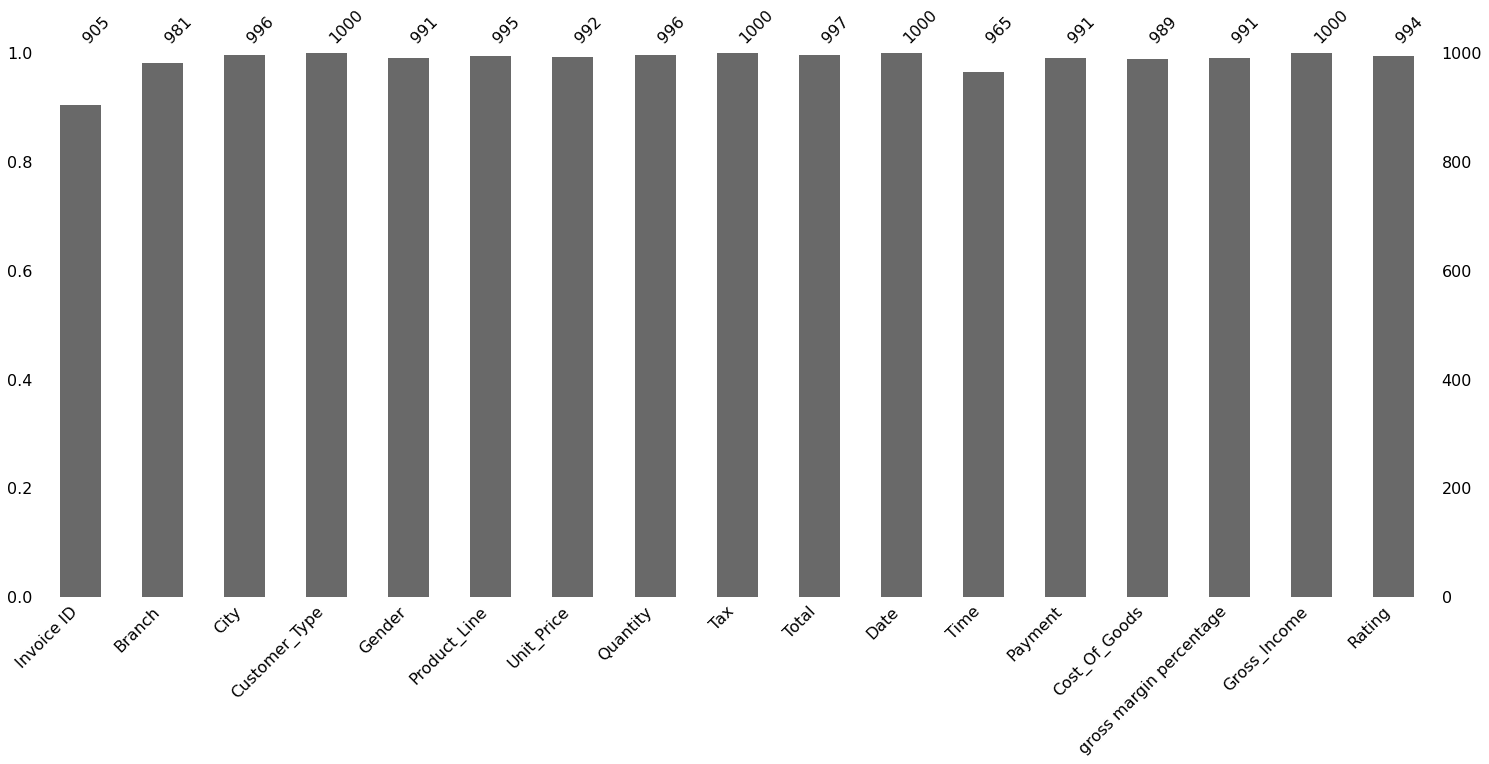

In [9]:
msno.bar(ssd)

#### Only Customer_Type, Tax and Gross_Income don't seem to have any missing values. However, there may be data entry errors that need to be catered.

<AxesSubplot:>

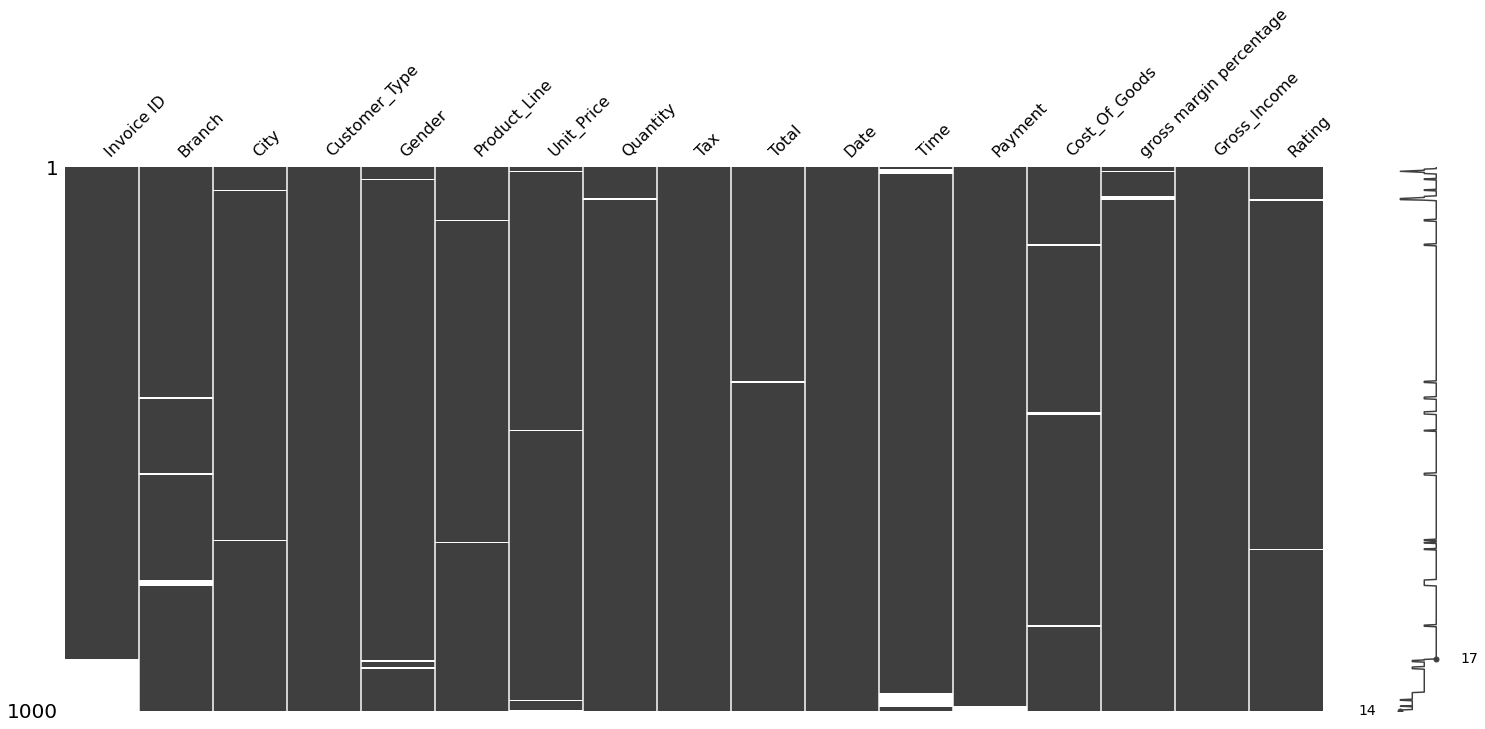

In [10]:
# Matrix of missing values
msno.matrix(ssd)

#### The missing value matrix above shows that there is a spread of missing values throughout the dataset. Invoice ID Branch, Time and Cost_Of_Goods seem to have a good deal of missing values.

<AxesSubplot:>

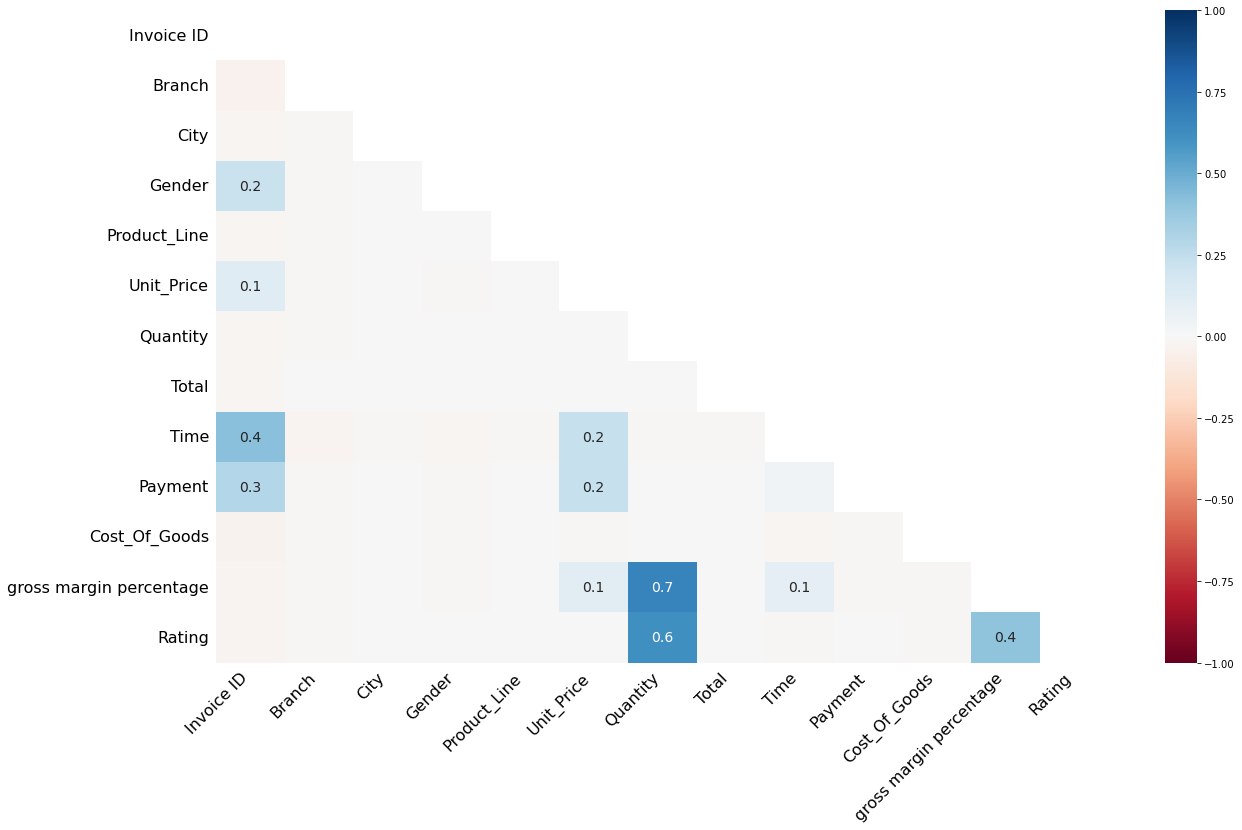

In [11]:
# Correlation heatmap of missingness
msno.heatmap(ssd)

#### The above missing value correlation heatmap shows that there is a high correlation between quantity and gross margin % and between quantity and Rating. Let us see later if the correlation heatmap helps us in strengthening this argument

In [12]:
# Only, columns with missing values, the total number along with the %age
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
# Display missing value stats of columns with missing values
Missing_df = missing_values_table(ssd)
display(Missing_df)

Your selected dataframe has 17 columns.
There are 13 columns that have missing values.


,Missing Values,% of Total Values
Invoice ID,95,9.5
Time,35,3.5
Branch,19,1.9
Cost_Of_Goods,11,1.1
Gender,9,0.9
Payment,9,0.9
gross margin percentage,9,0.9
Unit_Price,8,0.8
Rating,6,0.6
Product_Line,5,0.5


#### The above piece of code generates a table that shows us all the columns where there are missing values. The most seem to be in Invoice ID and Time.

In [14]:
# Index of all the rows with missing values
rows_with_nan = [index for index, row in ssd.iterrows() if row.isnull().any()]
print("Total number of rows with missing values: ", len(rows_with_nan))

Total number of rows with missing values:  160


In [15]:
ssd=ssd.drop(['Invoice ID', 'gross margin percentage'], axis=1)
ssd.head(10)

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Cost_Of_Goods,Gross_Income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.22,3/8/2019,10:29,Cash,76.40,3.82,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.048,1/27/2019,20:33,Ewallet,465.76,23.288,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,30.2085,5.3
5,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,NaN,Ewallet,597.73,29.8865,4.1
6,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.692,2/25/2019,NaN,Ewallet,413.04,20.652,5.8
7,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.38,1/22/1900,NaN,Ewallet,735.60,36.78,8.0
8,A,Yangon,Member,Female,Health and beauty,NaN,2,3.6260,76.146,1/10/2019,NaN,Credit card,72.52,3.626,7.2
9,B,Mandalay,Member,Female,Food and beverages,NaN,3,8.2260,172.746,2/20/2019,NaN,Credit card,164.52,8.226,5.9


#### Dropped Invoice ID because it has no practical value for BI purposes. No KPI would be measured against this thus removed it. Gross Margin Percentage only had one repating value of '4.761904762' thus in accordance with the low variance filtering strategy it was also removed.

In [16]:
# Get the numerical and categorical columns separately
def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    #print(num_columns)
    return num_columns

def get_cat_cols(df):
    types_map = df.dtypes.to_dict()
    cat_columns = []
    for k,v in types_map.items():
        if not( np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v)):
            cat_columns.append(k)

    #print(cat_columns)
    return cat_columns

In [17]:
numeric_columns = get_num_cols(ssd)
print(numeric_columns)

['Unit_Price', 'Tax', 'Cost_Of_Goods', 'Rating']


In [18]:
categorical_columns = get_cat_cols(ssd)
print(categorical_columns)

['Branch', 'City', 'Customer_Type', 'Gender', 'Product_Line', 'Quantity', 'Total', 'Date', 'Time', 'Payment', 'Gross_Income']


# Handling Data Entry Errors Separately for each Column due to variation in the errors

In [19]:
# Value counts of categorical columns:

for col in categorical_columns:
    print(ssd[col].value_counts())
    print()

A    332
C    325
B    324
Name: Branch, dtype: int64

Yangon        335
Mandalay      329
Naypyitaw     324
Yangono         3
Yangon0         2
Naypyitay       1
Naypyitawe      1
Naypyitawp      1
Name: City, dtype: int64

Member    501
Normal    499
Name: Customer_Type, dtype: int64

Male      497
Female    494
Name: Gender, dtype: int64

Fashion accessories            177
Food and beverages             171
Electronic accessories         164
Sports and travel              163
Home and lifestyle             158
Health and beauty              151
Electronic access                2
Electronic a                     1
Home and lifest                  1
Food and bever                   1
Health and bea                   1
Fashion access                   1
Electr                           1
Electronic accessories+F327      1
Sports and tr                    1
Sports and tra                   1
Name: Product_Line, dtype: int64

10       117
1        111
4        109
7        102
5        1

#### We can see that there are no Data entry errors in Branch, Customer Type, and Gender, though they may have missing values. The rest of the columns either have useless special characters, or words in numerical columns that need to be handled.

#### 1) Branch: There seem to be no data entry errors in Branch. Only null values.

In [20]:
ssd['Branch'].value_counts().index.sort_values(ascending = False)

Index(['C', 'B', 'A'], dtype='object')

#### 2) City: There seem to be a few data entry errors in City. We will handle them by replacing them with NaN.

In [21]:
ssd['City'].value_counts().index.sort_values(ascending = False)

Index(['Yangono', 'Yangon0', 'Yangon', 'Naypyitay', 'Naypyitawp', 'Naypyitawe',
       'Naypyitaw', 'Mandalay'],
      dtype='object')

In [22]:
# Replacing unnecessary characters with NaN
ssd['City'] = ssd['City'].replace(['Yangono', 'Yangon0'], 'Yangon')
ssd['City'] = ssd['City'].replace(['Naypyitay', 'Naypyitawe', 'Naypyitawp'], 'Naypyitaw')
                    
print(ssd['City'].value_counts())

Yangon       340
Mandalay     329
Naypyitaw    327
Name: City, dtype: int64


#### 3) Customer Type and Gender: don't seem to have any data entry errors, only null values which we will handle later.

#### 4) Product Line has a few data entry errors which we will be handling in the same way as above.

In [23]:
ssd['Product_Line'].value_counts().index.sort_values(ascending = False)

Index(['Sports and travel', 'Sports and tra', 'Sports and tr',
       'Home and lifestyle', 'Home and lifest', 'Health and beauty',
       'Health and bea', 'Food and beverages', 'Food and bever',
       'Fashion accessories', 'Fashion access', 'Electronic accessories+F327',
       'Electronic accessories', 'Electronic access', 'Electronic a',
       'Electr'],
      dtype='object')

In [24]:
# Replacing unnecessary characters with NaN
ssd['Product_Line'] = ssd['Product_Line'].replace(['Sports and tra', 'Sports and tr'], 'Sports and travel')
ssd['Product_Line'] = ssd['Product_Line'].replace('Home and lifest', 'Home and lifestyle') 
ssd['Product_Line'] = ssd['Product_Line'].replace('Health and bea', 'Health and beauty')
ssd['Product_Line'] = ssd['Product_Line'].replace('Food and bever', 'Food and beverages')
ssd['Product_Line'] = ssd['Product_Line'].replace('Fashion access', 'Fashion accessories') 
ssd['Product_Line'] = ssd['Product_Line'].replace(['Electronic accessories+F327', 'Electronic access', 'Electronic a',
                                                   'Electr'], 'Electronic accessories')

print(ssd['Product_Line'].value_counts())

Fashion accessories       178
Food and beverages        172
Electronic accessories    169
Sports and travel         165
Home and lifestyle        159
Health and beauty         152
Name: Product_Line, dtype: int64


#### 5) Unit price only has null values, no entry errors, so we will handle it later

#### 6) Quantity has a few data entry errors, which we will be replacing with null values

In [25]:
ssd['Quantity'].value_counts().index.sort_values(ascending = False)

Index(['few%&', 'few', '9', '8', '7', '6', '5', '4', '3', '2', '10', '1',
       '*(()', '%*&'],
      dtype='object')

In [26]:
ssd['Quantity'] = ssd['Quantity'].replace(['few%&', 'few', '*(()', '%*&'], np.nan)
print(ssd['Quantity'].value_counts())

10    117
1     111
4     109
7     102
5     102
6      97
9      92
2      90
3      89
8      83
Name: Quantity, dtype: int64


#### Tax 5% only has null values, no entry errors, so we will handle it later

In [27]:
ssd['Tax'].value_counts().index.sort_values(ascending = False)

Float64Index([ 49.65,  49.49,  49.26,  48.75,  48.69, 48.685, 48.605,  47.79,
               47.72, 45.325,
              ...
              0.8875,  0.814,  0.775, 0.7715,  0.767,  0.699,  0.639,  0.627,
              0.6045, 0.5085],
             dtype='float64', length=990)

#### 6) Total has a few data entry errors, which we will be replacing with null values

In [28]:
ssd['Total'].value_counts().index.sort_values(ascending = False)

Index(['whoa', 'very high', 'toolow', '99.9075', '99.75', '99.54', '99.33',
       '98.049', '98.028', '97.881',
       ...
       '101.808', '101.64', '1003.59', '1002.12', '100.9155', '100.485',
       '100.128', '10.6785', '$$$$$$$', '#####'],
      dtype='object', length=987)

In [29]:
ssd['Total'] = ssd['Total'].replace(['whoa', 'very high', 'toolow', '$$$$$$$', '#####'], np.nan)
print(ssd['Total'].value_counts())

87.234      2
175.917     2
93.744      2
263.97      2
470.988     2
           ..
150.0975    1
404.649     1
151.4835    1
411.3795    1
649.299     1
Name: Total, Length: 982, dtype: int64


In [30]:
ssd['Date'].value_counts().index.sort_values(ascending = True)

Index(['/26/2019', '1/1/2019', '1/10/', '1/10/2019', '1/11/2019', '1/12/2019',
       '1/13/2019', '1/14/2019', '1/15/2019', '1/16/2019', '1/17/2019',
       '1/18/2019', '1/19/2019', '1/2/2019', '1/20/2019', '1/21/2019',
       '1/22/1900', '1/22/2019', '1/23/2019', '1/24/2019', '1/25/2019',
       '1/26/2019', '1/27/2019', '1/28/', '1/28/2019', '1/29/2019', '1/3/2019',
       '1/30/2019', '1/31/2019', '1/4/2019', '1/5/2019', '1/6/', '1/6/2019',
       '1/7/2019', '1/8/2019', '1/9/2019', '2//2019', '2/1/2019', '2/10/2019',
       '2/11/2019', '2/12/2019', '2/13/2019', '2/14/2019', '2/15/2018',
       '2/15/2019', '2/16/2019', '2/17/2019', '2/18/2019', '2/19/2019',
       '2/2/2019', '2/20/2019', '2/21/2019', '2/22/2019', '2/23/2019',
       '2/24/2019', '2/25/2019', '2/26/2019', '2/27/2019', '2/28/2019',
       '2/3/2019', '2/4/2019', '2/5/2018', '2/5/2019', '2/6/2019', '2/7/2019',
       '2/8/2019', '2/9/2019', '3//2019', '3/1/2019', '3/10/2019', '3/11/2019',
       '3/12/2019', '3/1

#### 6) Date: has a few data entry errors, some dates are missing a year, some a month, there is a date from 1900. We will handle them later.

#### 7) Time: only has missing values, we will handle them later

In [31]:
ssd['Time'].value_counts().index.sort_values(ascending = True)

Index(['10:00', '10:01', '10:02', '10:03', '10:04', '10:05', '10:06', '10:08',
       '10:09', '10:10',
       ...
       '20:46', '20:47', '20:48', '20:50', '20:51', '20:52', '20:54', '20:55',
       '20:57', '20:59'],
      dtype='object', length=501)

#### 8) Payment: A few data entry errors over here, we'll be converting them to Nan

In [32]:
ssd['Payment'].value_counts().index.sort_values(ascending = True)

Index(['123', '332', '444', '98', 'Cash', 'Credit card', 'Ewallet'], dtype='object')

In [33]:
ssd['Payment'] = ssd['Payment'].replace(['123', '332', '444', '98'], np.nan)
print(ssd['Payment'].value_counts())

Ewallet        338
Cash           338
Credit card    311
Name: Payment, dtype: int64


#### 9) Cost of goods sold (cogs) has a few null values that we will handle later

In [34]:
ssd['Cost_Of_Goods'].value_counts().index.sort_values(ascending = True)

Float64Index([10.17, 12.09, 12.54, 12.78, 13.98, 15.34, 15.43,  15.5, 16.28,
              17.75,
              ...
              906.5, 954.4, 955.8, 972.1, 973.7, 973.8, 975.0, 985.2, 989.8,
              993.0],
             dtype='float64', length=980)

#### 10) gross income has a few data entry errors that we will handle by replacing them with Nan

In [35]:
ssd['Gross_Income'].value_counts().index.sort_values(ascending = False)

Index(['low', 'high', '9.989', '9.982', '9.979', '9.958', '9.9375', '9.937',
       '9.925', '9.909',
       ...
       '0.8875', '0.814', '0.775', '0.7715', '0.767', '0.699', '0.639',
       '0.627', '0.6045', '0.5085'],
      dtype='object', length=987)

In [36]:
ssd['Gross_Income'] = ssd['Gross_Income'].replace(['low', 'high'], np.nan)
print(ssd['Gross_Income'].value_counts())

10.326     2
22.428     2
10.3635    2
9.0045     2
4.154      2
          ..
7.1475     1
19.269     1
7.2135     1
19.5895    1
30.919     1
Name: Gross_Income, Length: 985, dtype: int64


#### 11) Rating only seems to have missing values, which we will handle later.

In [37]:
ssd['Rating'].value_counts().index.sort_values(ascending = False)

Float64Index([10.0,  9.9,  9.8,  9.7,  9.6,  9.5,  9.4,  9.3,  9.2,  9.1,  9.0,
               8.9,  8.8,  8.7,  8.6,  8.5,  8.4,  8.3,  8.2,  8.1,  8.0,  7.9,
               7.8,  7.7,  7.6,  7.5,  7.4,  7.3,  7.2,  7.1,  7.0,  6.9,  6.8,
               6.7,  6.6,  6.5,  6.4,  6.3,  6.2,  6.1,  6.0,  5.9,  5.8,  5.7,
               5.6,  5.5,  5.4,  5.3,  5.2,  5.1,  5.0,  4.9,  4.8,  4.7,  4.6,
               4.5,  4.4,  4.3,  4.2,  4.1,  4.0],
             dtype='float64')

#### Using value_counts and index_sort, we were able to push the errors such as unnecessary strings and numbers to the end of the list. This enabled us to view all the errors and handle them by replacing them with null. Ina few places such as Product Line and City, we did not replace with NaN, since there were only spelling errors.

In [38]:
ssd.isnull().sum()

Branch           19
City              4
Customer_Type     0
Gender            9
Product_Line      5
Unit_Price        8
Quantity          8
Tax               0
Total             8
Date              0
Time             35
Payment          13
Cost_Of_Goods    11
Gross_Income      5
Rating            6
dtype: int64

In [39]:
ssd.dtypes

Branch            object
City              object
Customer_Type     object
Gender            object
Product_Line      object
Unit_Price       float64
Quantity          object
Tax              float64
Total             object
Date              object
Time              object
Payment           object
Cost_Of_Goods    float64
Gross_Income      object
Rating           float64
dtype: object

In [40]:
# Changing data type of columns. (Based on inuition)
ssd = ssd.astype({'Quantity': 'float64', 'Gross_Income': 'float64', 'Total': 'float64'})

In [41]:
ssd.dtypes

Branch            object
City              object
Customer_Type     object
Gender            object
Product_Line      object
Unit_Price       float64
Quantity         float64
Tax              float64
Total            float64
Date              object
Time              object
Payment           object
Cost_Of_Goods    float64
Gross_Income     float64
Rating           float64
dtype: object

#### We changed the data types of Total, Quantity, and Gross_Income to float since they were represented as object. This was done to see their correlation in the heatmap

## 3) Filling Missing Values

### Correlation Heatmap. This will help in figuring how numeric columns with Nan can be filled

<AxesSubplot:>

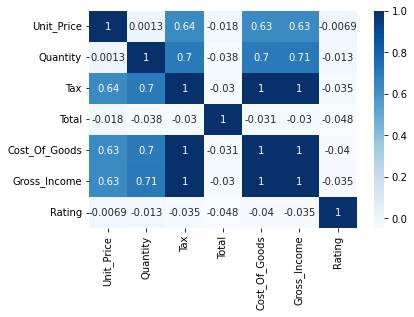

In [42]:
# Plotting heatmap
import seaborn as sns
corr = ssd.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

### From the above heatmap it can be established that 'gross income', 'Quantity', 'Tax', 'Cost of Goods Sold', 'Unit price' and 'Total' are highly correlated.

#### Handling missing values in 'Total' column:

In [43]:
ssd['Total'].isnull().sum()

8

In [44]:
#These are the indexes where Total column has null values
total_null = ssd[ssd['Total'].isnull()].index.tolist()
print(total_null)
#[120, 281, 312, 338]


# replacing the null values with calculated values using corresponding row index
for row in total_null:
    ssd.loc[row, 'Total'] = (ssd.loc[row,'Unit_Price'] * ssd.loc[row,'Quantity']) + ssd.loc[row,'Tax']

print("Number of missing values: ", ssd['Total'].isnull().sum())

[306, 391, 394, 395, 396, 412, 433, 518]
Number of missing values:  0


#### The same formula of (Total = Quantity * Unit_Price + Tax) was used to find the Total

In [45]:
#These are the indexes where Unit price column has null values
unit_price_null = ssd[ssd['Unit_Price'].isnull()].index.tolist()
print(unit_price_null)
#[120, 281, 312, 338]


# replacing the null values with calculated values using corresponding row index
for row in unit_price_null:
    ssd.loc[row, 'Unit_Price'] = (ssd.loc[row,'Total'] - ssd.loc[row,'Tax']) / ssd.loc[row,'Quantity']

print("Number of missing values: ", ssd['Unit_Price'].isnull().sum())

[8, 9, 484, 485, 979, 980, 998, 999]
Number of missing values:  0


#### The same formula of (Total = Quantity * Unit_Price + Tax) was used to find the Unit_Price

In [46]:
#These are the indexes where Quantity column has null values
Quantity_null = ssd[ssd['Quantity'].isnull()].index.tolist()
print(Quantity_null)

# replacing the null values with calculated values using corresponding row index
for row in Quantity_null:
    ssd.loc[row, 'Quantity'] = (ssd.loc[row,'Total'] - ssd.loc[row,'Tax']) / ssd.loc[row,'Unit_Price']

print("Number of missing values: ", ssd['Quantity'].isnull().sum())

[57, 58, 59, 60, 223, 244, 357, 381]
Number of missing values:  0


#### The same formula of (Total = Quantity * Unit_Price + Tax) was used to find the Quantity

In [47]:
#These are the indexes where Tax 5% column has null values
gross_null = ssd[ssd['Gross_Income'].isnull()].index.tolist()
print(gross_null)

# replacing the null values with calculated values using corresponding row index
for row in gross_null:
    ssd.loc[row, 'Gross_Income'] = ssd.loc[row,'Tax']

print("Number of missing values: ", ssd['Gross_Income'].isnull().sum())

[702, 703, 704, 845, 958]
Number of missing values:  0


#### The Gross_Income was the same as the Tax and thus we just had to replace it with Tax

In [48]:
#These are the indexes where cogs column has null values
cogs_null = ssd[ssd['Cost_Of_Goods'].isnull()].index.tolist()
print(cogs_null)

# replacing the null values with calculated values using corresponding row index
for row in cogs_null:
    ssd.loc[row, 'Cost_Of_Goods'] = ssd.loc[row, 'Total'] - ssd.loc[row,'Tax']

print("Number of missing values: ", ssd['Cost_Of_Goods'].isnull().sum())

[142, 143, 144, 450, 451, 452, 453, 454, 842, 843, 844]
Number of missing values:  0


#### Since the formula of Cost_Of_Goods is Total - Tax, thus it was fairly easy to fill in the missng values of it.

In [49]:
branch_null = ssd[ssd['Branch'].isnull()].index.tolist()
print(branch_null)

for index in branch_null:
    if (ssd.loc[index, 'City'] == 'Yangon'):
        ssd.loc[index, 'Branch'] = 'A'
    elif (ssd.loc[index, 'City'] == 'Mandalay'):
        ssd.loc[index, 'Branch'] = 'B'
    elif(ssd.loc[index, 'City'] == 'Naypyitaw'):
        ssd.loc[index, 'Branch'] = 'C'

print("Number of missing values: ", ssd['Branch'].isnull().sum())

[423, 424, 425, 426, 563, 564, 565, 566, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769]
Number of missing values:  0


#### Since ther was a one-to-one mapping from branch to city therefore we replaced it accordingly

In [50]:
city_null = ssd[ssd['City'].isnull()].index.tolist()
print(city_null)

for index in city_null:
    if (ssd.loc[index, 'Branch'] == 'A'):
        ssd.loc[index, 'City'] = 'Yangon'
    elif (ssd.loc[index, 'Branch'] == 'B'):
        ssd.loc[index, 'City'] = 'Mandalay'
    elif(ssd.loc[index, 'Branch'] == 'Naypyitaw'):
        ssd.loc[index, 'City'] = 'C'

print("Number of missing values: ", ssd['City'].isnull().sum())

[42, 43, 685, 686]
Number of missing values:  1


#### Same is done here as above, city replaced in accordance to the branch

In [51]:
# Display missing value stats of columns with missing values
Missing_df = missing_values_table(ssd)
display(Missing_df)

Your selected dataframe has 15 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Time,35,3.5
Payment,13,1.3
Gender,9,0.9
Rating,6,0.6
Product_Line,5,0.5
City,1,0.1


#### The number of columns with missing values has reduced after handling Total, Cost_Of_Goods, Gross_Income, Quantity, Unit_Price, Branch and City

In [52]:
from dython.nominal import associations

In [53]:
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(ssd)
categorical_features

['Branch',
 'City',
 'Customer_Type',
 'Gender',
 'Product_Line',
 'Date',
 'Time',
 'Payment']

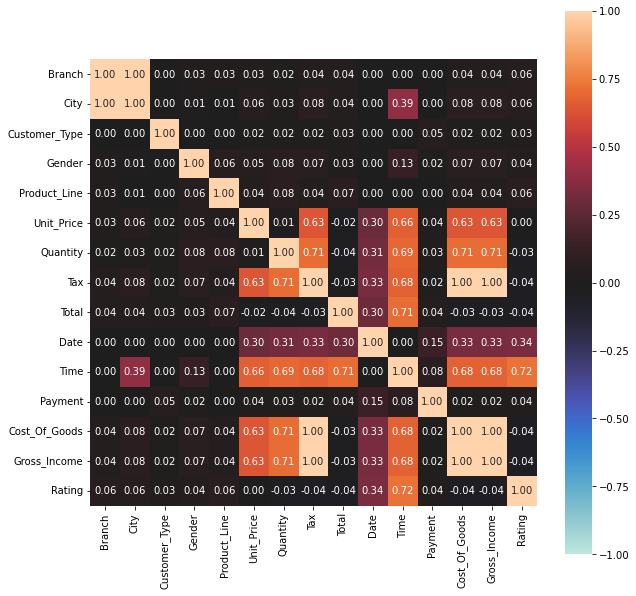

In [54]:
complete_correlation= associations(ssd, filename= 'supermarket_sales_dirty.png', figsize=(10,10))

#### Using the dython library to show correlation between categorical columns yielded no helpful result. Thus we will have to replace the missing values in other categorical columns using mode groupby-ed columns they logically should have a relation with. (Intuitive Decision Making)

In [55]:
ssd[ssd['Gender'].isnull()]

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Cost_Of_Goods,Gross_Income,Rating
22,B,Mandalay,Normal,NaN,Home and lifestyle,33.20,2.0,3.3200,69.7200,3/15/2019,12:20,Credit card,66.40,3.3200,4.4
23,A,Yangon,Normal,NaN,Electronic accessories,34.56,5.0,8.6400,181.4400,2/17/2019,11:15,Ewallet,172.80,8.6400,9.9
907,B,Mandalay,Normal,NaN,Health and beauty,82.88,5.0,20.7200,435.1200,3/24/2019,14:08,Credit card,414.40,20.7200,6.6
908,A,Yangon,Member,NaN,Food and beverages,79.54,2.0,7.9540,167.0340,3/27/2019,16:30,Ewallet,159.08,7.9540,6.2
909,B,Mandalay,Normal,NaN,Home and lifestyle,49.01,10.0,24.5050,514.6050,1/27/2019,10:44,Credit card,490.10,24.5050,4.2
919,B,Mandalay,Member,NaN,Electronic accessories,26.26,3.0,3.9390,82.7190,3/2/2019,12:36,Ewallet,78.78,3.9390,6.3
920,C,Naypyitaw,Member,NaN,Home and lifestyle,35.79,9.0,16.1055,338.2155,3/10/2019,15:06,Credit card,322.11,16.1055,5.1
921,B,Mandalay,Normal,NaN,Home and lifestyle,16.37,6.0,4.9110,103.1310,2/8/2019,10:58,Cash,98.22,4.9110,7.0
922,C,Naypyitaw,Member,NaN,Home and lifestyle,12.73,2.0,1.2730,26.7330,2/22/2019,12:10,Credit card,25.46,1.2730,5.2


In [56]:
print("Electronic accessories Member", ssd[(ssd['Product_Line'] == 'Electronic accessories') & (ssd['Customer_Type'] == 'Member')]['Gender'].mode())
print("Electronic accessories Normal", ssd[(ssd['Product_Line'] == 'Electronic accessories') & (ssd['Customer_Type'] == 'Normal')]['Gender'].mode())

print("Home and lifestyle Member", ssd[(ssd['Product_Line'] == 'Home and lifestyle') & (ssd['Customer_Type'] == 'Member')]['Gender'].mode())
print("Home and lifestyle Normal", ssd[(ssd['Product_Line'] == 'Home and lifestyle') & (ssd['Customer_Type'] == 'Normal')]['Gender'].mode())

print("Food and beverages Member", ssd[(ssd['Product_Line'] == 'Food and beverages') & (ssd['Customer_Type'] == 'Member')]['Gender'].mode())
print("Food and beverages Normal", ssd[(ssd['Product_Line'] == 'Food and beverages') & (ssd['Customer_Type'] == 'Normal')]['Gender'].mode())

print("Health and Beauty Member", ssd[(ssd['Product_Line'] == 'Health and beauty') & (ssd['Customer_Type'] == 'Member')]['Gender'].mode())
print("Health and beauty Normal", ssd[(ssd['Product_Line'] == 'Health and beauty') & (ssd['Customer_Type'] == 'Normal')]['Gender'].mode())

Electronic accessories Member 0    Male
dtype: object
Electronic accessories Normal 0    Female
dtype: object
Home and lifestyle Member 0    Female
dtype: object
Home and lifestyle Normal 0    Male
dtype: object
Food and beverages Member 0    Female
dtype: object
Food and beverages Normal 0    Male
dtype: object
Health and Beauty Member 0    Male
dtype: object
Health and beauty Normal 0    Male
dtype: object


#### Made rules for finding which Gender value should replace the NaN. Calculated the mode by Customer Type and Product Line to replace the NaN values below

In [57]:
ssd['Gender'] = ssd['Gender'].mask((ssd['Gender'].isnull()) & (ssd['Product_Line'] == 'Electronic accessories') & (ssd['Customer_Type'] == 'Member'), 'Male')
ssd['Gender'] = ssd['Gender'].mask((ssd['Gender'].isnull()) & (ssd['Product_Line'] == 'Electronic accessories') & (ssd['Customer_Type'] == 'Normal'), 'Female')

ssd['Gender'] = ssd['Gender'].mask((ssd['Gender'].isnull()) & (ssd['Product_Line'] == 'Home and lifestyle') & (ssd['Customer_Type'] == 'Member'), 'Female')
ssd['Gender'] = ssd['Gender'].mask((ssd['Gender'].isnull()) & (ssd['Product_Line'] == 'Home and lifestyle') & (ssd['Customer_Type'] == 'Normal'), 'Male')

ssd['Gender'] = ssd['Gender'].mask((ssd['Gender'].isnull()) & (ssd['Product_Line'] == 'Food and beverages') & (ssd['Customer_Type'] == 'Member'), 'Female')
ssd['Gender'] = ssd['Gender'].mask((ssd['Gender'].isnull()) & (ssd['Product_Line'] == 'Food and beverages') & (ssd['Customer_Type'] == 'Normal'), 'Male')

ssd['Gender'] = ssd['Gender'].mask((ssd['Gender'].isnull()) & (ssd['Product_Line'] == 'Health and beauty') & (ssd['Customer_Type'] == 'Member'), 'Male')
ssd['Gender'] = ssd['Gender'].mask((ssd['Gender'].isnull()) & (ssd['Product_Line'] == 'Health and beauty') & (ssd['Customer_Type'] == 'Normal'), 'Male')

ssd['Gender'].isnull().sum()

0

#### Replaced values in Gender based off Product_Line and Customer_Type. The logic behind this was that the gender may vary depending on the different Product categories. To yield more credibility, I added Customer Type as well.

In [58]:
ssd[ssd['Customer_Type'].isnull()]

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Cost_Of_Goods,Gross_Income,Rating


#### Customer Type has no Null values. We don't need to work on it.

In [59]:
ssd[ssd['Product_Line'].isnull()]

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Cost_Of_Goods,Gross_Income,Rating
97,C,Naypyitaw,Normal,Female,NaN,12.45,6.0,3.7350,78.4350,2/9/2019,13:11,Cash,74.70,3.7350,4.1
98,A,Yangon,Normal,Male,NaN,52.75,3.0,7.9125,166.1625,3/23/2019,10:16,Ewallet,158.25,7.9125,9.3
99,B,Mandalay,Normal,Male,NaN,82.70,6.0,24.8100,521.0100,3/5/2019,18:14,Cash,496.20,24.8100,7.4
690,C,Naypyitaw,Member,Female,NaN,70.19,9.0,31.5855,663.2955,1/25/2019,13:38,Cash,631.71,31.5855,6.7
691,C,Naypyitaw,Member,Male,NaN,55.04,7.0,19.2640,404.5440,3/12/2019,19:39,Ewallet,385.28,19.2640,5.2


In [60]:
print("Male Member", ssd[(ssd['Customer_Type'] == 'Member') & (ssd['Gender'] == 'Male')]['Product_Line'].mode())
print("Male Normal", ssd[(ssd['Customer_Type'] == 'Normal') & (ssd['Gender'] == 'Male')]['Product_Line'].mode())

print("Female Member", ssd[(ssd['Customer_Type'] == 'Member') & (ssd['Gender'] == 'Female')]['Product_Line'].mode())
print("Female Normal", ssd[(ssd['Customer_Type'] == 'Normal') & (ssd['Gender'] == 'Female')]['Product_Line'].mode())

Male Member 0    Electronic accessories
dtype: object
Male Normal 0     Health and beauty
1    Home and lifestyle
dtype: object
Female Member 0    Food and beverages
dtype: object
Female Normal 0    Electronic accessories
1       Fashion accessories
dtype: object


#### Made rules for finding which Product Line value should replace the NaN. Calculated the mode by Customer Type and Gender to replace the NaN values below

In [61]:
ssd['Product_Line'] = ssd['Product_Line'].mask((ssd['Product_Line'].isnull()) & (ssd['Gender'] == 'Male') & (ssd['Customer_Type'] == 'Member'), 'Electronic accessories')
ssd['Product_Line'] = ssd['Product_Line'].mask((ssd['Product_Line'].isnull()) & (ssd['Gender'] == 'Male') & (ssd['Customer_Type'] == 'Normal'), 'Health and beauty')

ssd['Product_Line'] = ssd['Product_Line'].mask((ssd['Product_Line'].isnull()) & (ssd['Gender'] == 'Female') & (ssd['Customer_Type'] == 'Member'), 'Food and beverages')
ssd['Product_Line'] = ssd['Product_Line'].mask((ssd['Product_Line'].isnull()) & (ssd['Gender'] == 'Female') & (ssd['Customer_Type'] == 'Normal'), 'Elecronic accessories')

In [62]:
ssd['Product_Line'].isnull().sum()

0

In [63]:
# Display missing value stats of columns with missing values
Missing_df = missing_values_table(ssd)
display(Missing_df)

Your selected dataframe has 15 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Time,35,3.5
Payment,13,1.3
Rating,6,0.6
City,1,0.1


In [64]:
ssd[ssd['Payment'].isnull()]

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Cost_Of_Goods,Gross_Income,Rating
856,B,Mandalay,Normal,Male,Food and beverages,21.12,8.0,8.4480,177.4080,1/1/2019,19:31,NaN,168.96,8.4480,6.3
857,A,Yangon,Member,Female,Home and lifestyle,28.31,4.0,5.6620,118.9020,3/7/2019,18:35,NaN,113.24,5.6620,8.2
858,B,Mandalay,Normal,Male,Health and beauty,57.59,6.0,17.2770,362.8170,2/15/2019,13:51,NaN,345.54,17.2770,5.1
886,A,Yangon,Member,Male,Food and beverages,87.90,1.0,4.3950,92.2950,2/5/2019,19:42,NaN,87.90,4.3950,6.7
991,B,Mandalay,Normal,Female,Sports and travel,76.60,10.0,38.3000,804.3000,1/24/2019,NaN,NaN,766.00,38.3000,6.0
992,A,Yangon,Normal,Male,Electronic accessories,58.03,2.0,5.8030,121.8630,3/10/2019,20:46,NaN,116.06,5.8030,8.8
993,B,Mandalay,Normal,Male,Fashion accessories,17.49,10.0,8.7450,183.6450,2/22/2019,18:35,NaN,174.90,8.7450,6.6
994,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1.0,3.0475,63.9975,2/18/2019,11:40,NaN,60.95,3.0475,5.9
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.0175,42.3675,1/29/2019,13:46,NaN,40.35,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,48.6900,1022.4900,3/2/2019,17:16,NaN,973.80,48.6900,4.4


In [65]:
print("Total within 250", ssd[(ssd['Total'] > 0) & (ssd['Total'] <= 250)]['Payment'].mode())
print("Total b/w 250 & 500", ssd[(ssd['Total'] > 251) & (ssd['Total'] <= 500)]['Payment'].mode())
print("Total b/w 500 & 750", ssd[(ssd['Total'] > 501) & (ssd['Total'] <= 750)]['Payment'].mode())
print("Total b/w 751 & 1000", ssd[(ssd['Total'] > 751) & (ssd['Total'] <= 1000)]['Payment'].mode())
print("Total > 1000", ssd[(ssd['Total'] > 1001)]['Payment'].mode())

Total within 250 0    Ewallet
dtype: object
Total b/w 250 & 500 0    Cash
dtype: object
Total b/w 500 & 750 0    Cash
dtype: object
Total b/w 751 & 1000 0    Credit card
dtype: object
Total > 1000 0    Credit card
dtype: object


#### Since, Intuitively, Payment Type depends on the Total amount paid, looking at the dataset, I found that Total in excess of 700 was paid by Credit and Total below 500 was being paid by Ewallet, therefore I divided the Total in brackets of 250 and calculalted the mode of Payment type.

In [66]:
ssd['Payment'] = ssd['Payment'].mask((ssd['Payment'].isnull()) & (ssd['Total'] > 0) & (ssd['Total'] <= 250), 'Ewallet')
ssd['Payment'] = ssd['Payment'].mask((ssd['Payment'].isnull()) & (ssd['Total'] > 251) & (ssd['Total'] <= 500), 'Cash')
ssd['Payment'] = ssd['Payment'].mask((ssd['Payment'].isnull()) & (ssd['Total'] > 501) & (ssd['Total'] <= 750), 'Cash')
ssd['Payment'] = ssd['Payment'].mask((ssd['Payment'].isnull()) & (ssd['Total'] > 751) & (ssd['Total'] <= 1000), 'Credit card')
ssd['Payment'] = ssd['Payment'].mask((ssd['Payment'].isnull()) & (ssd['Total'] > 1001), 'Credit card')

#### After the calculation, I found my intuition was correct and therefore I replaced the NaN values according to the conditions above.

In [67]:
# Display missing value stats of columns with missing values
Missing_df = missing_values_table(ssd)
display(Missing_df)

Your selected dataframe has 15 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Time,35,3.5
Rating,6,0.6
City,1,0.1


In [68]:
ssd['Rating'] = ssd['Rating'].fillna((ssd['Rating'].mode()))

#### Since there were only a handful of Rating values, therefore I replaced the missing ones with the mode.

In [142]:
# Display missing value stats of columns with missing values
Missing_df = missing_values_table(ssd)
display(Missing_df)

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Rating,6,0.6


## 4) Handling Date and Time Columns

In [69]:
ssd[['Month', 'Day', 'Year']] = ssd['Date'].str.split('/', expand=True)

#### Stripped the Date into Month, Day and Year. This was done because Date had missing Year, Month and Day values in a few places and thus they could be filled individually easily.

In [70]:
ssd[['Hour', 'Minute']] = ssd['Time'].str.split(':', expand=True)

#### Stripped Time into Hour and Minute. This was done so that Hour and Minute could be filled individually easily.

In [71]:
ssd.head()

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Cost_Of_Goods,Gross_Income,Rating,Month,Day,Year,Hour,Minute
0,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,26.1415,9.1,1,5,2019,13,08
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,3.8200,9.6,3,8,2019,10,29
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,16.2155,7.4,3,3,2019,13,23
3,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,23.2880,8.4,1,27,2019,20,33
4,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,NaN,Ewallet,604.17,30.2085,5.3,2,8,2019,NaN,NaN


In [72]:
print("Mode of Month: ", ssd['Month'].mode())
print("Mode of Day: ", ssd['Day'].mode())

Mode of Month:  0    1
dtype: object
Mode of Day:  0    15
dtype: object


In [73]:
print("Mode of Hour: ", ssd['Hour'].mode())
print("Mode of Minute: ", ssd['Minute'].mode())

Mode of Hour:  0    19
dtype: object
Mode of Minute:  0    48
dtype: object


In [74]:
ssd['Year'].replace(np.nan, '2019', inplace=True)

In [75]:
ssd['Month'].fillna(ssd['Month'].mode()[0], inplace=True)
ssd['Day'].fillna(ssd['Day'].mode()[0], inplace=True)

In [76]:
ssd['Hour'].fillna(ssd['Hour'].mode()[0], inplace=True)
ssd['Minute'].fillna(ssd['Minute'].mode()[0], inplace=True)

#### Replacing Month, Day, Year, Hour and Minute individually with mode after stripping them.

In [77]:
# Joining the Year Month and Day back to the Date column again.
ssd['Date'] = (ssd[['Year', 'Month', 'Day']].T.agg('-'.join))

In [78]:
# Joining the Hour and Minute back to the Date column again.
ssd['Time'] = (ssd[['Hour', 'Minute']].T.agg(':'.join))

In [79]:
ssd.head()

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Date,Time,Payment,Cost_Of_Goods,Gross_Income,Rating,Month,Day,Year,Hour,Minute
0,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-1-5,13:08,Ewallet,522.83,26.1415,9.1,1,5,2019,13,08
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-3-8,10:29,Cash,76.40,3.8200,9.6,3,8,2019,10,29
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-3-3,13:23,Credit card,324.31,16.2155,7.4,3,3,2019,13,23
3,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-1-27,20:33,Ewallet,465.76,23.2880,8.4,1,27,2019,20,33
4,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-2-8,19:48,Ewallet,604.17,30.2085,5.3,2,8,2019,19,48


In [80]:
# Dropping Year Month and Day since we no longer need them.
ssd.drop(['Year', 'Month', 'Day'], inplace=True, axis=1)

In [81]:
# Dropping Hour and Minute since we no longer need them.
ssd.drop(['Hour', 'Minute'], inplace=True, axis=1)

In [82]:
# Replacing these anomalies manually, since they weren't being handled by the procedure above.
ssd.at[391, 'Date'] = '2019-1-26' # was 2019--26
ssd.at[[413, 916], 'Date'] = '2019-3-15' # was 2019-3-
ssd.at[[7], 'Date'] = '2019-1-22' # was 1900-1-22
ssd.at[[999], 'Date'] = '2019-2-15' # was 1900-1-22

In [83]:
# Merging Date and Time into 1 column.
ssd['DateTime'] = ssd['Date'] + ' ' + ssd['Time']

In [84]:
# Dropping Date
ssd.drop(['Date', 'Time'], inplace=True, axis=1)

In [85]:
# Converting DateTime column to data type DateTime.
ssd['DateTime'] = pd.to_datetime(ssd['DateTime'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-06 11:18:00

#### Wasn't able to find a solution to this error, tried solving it by removing the few rows with NaT values, however, it did not work (Tried below). This was the only problem I faced in this assignment.

In [86]:
ssd['DateTime'].dropna()

0       2019-1-5 13:08
1       2019-3-8 10:29
2       2019-3-3 13:23
3      2019-1-27 20:33
4       2019-2-8 19:48
            ...       
995    2019-1-29 13:46
996     2019-3-2 17:16
997     2019-2-9 13:22
998    2019-2-22 15:33
999    2019-2-15 13:28
Name: DateTime, Length: 1000, dtype: object

In [87]:
ssd[ssd['DateTime'].isnull()]

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Payment,Cost_Of_Goods,Gross_Income,Rating,DateTime


In [88]:
ssd['Year'] = ssd['DateTime'].dt.year
ssd['Quarter'] = ssd['DateTime'].dt.quarter
ssd['Month'] = ssd['DateTime'].dt.month
ssd['Day'] = ssd['Date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

#### Was not able to resolve this problem.

## 5) Outlier Analysis

In [92]:
# Box Plot
def box_plots(num_cols, df):
    for i in range(len(num_cols)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.boxplot(x = df[num_cols[i]])

# Distribution plots
def dis_plots(num_cols, df): 
    for i in range(len(num_cols)-1):
        plt.figure(figsize=(10, 5), dpi = 100)
        sns.distplot(x = df[num_cols[i]])

In [93]:
numeric_columns = get_num_cols(ssd)
print("Numeric Columns", numeric_columns)

categorical_columns = get_cat_cols(ssd)
print("Categorical Columns", categorical_columns)

Numeric Columns ['Unit_Price', 'Quantity', 'Tax', 'Total', 'Cost_Of_Goods', 'Gross_Income', 'Rating']
Categorical Columns ['Branch', 'City', 'Customer_Type', 'Gender', 'Product_Line', 'Payment', 'DateTime']


In [94]:
ssd.dtypes

Branch            object
City              object
Customer_Type     object
Gender            object
Product_Line      object
Unit_Price       float64
Quantity         float64
Tax              float64
Total            float64
Payment           object
Cost_Of_Goods    float64
Gross_Income     float64
Rating           float64
DateTime          object
dtype: object

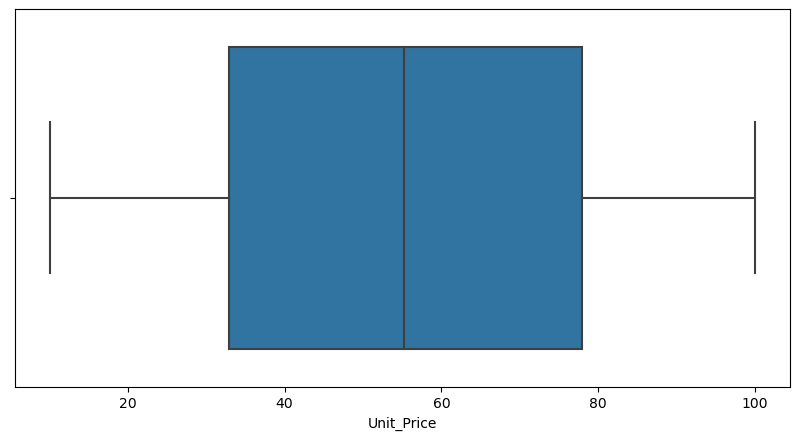

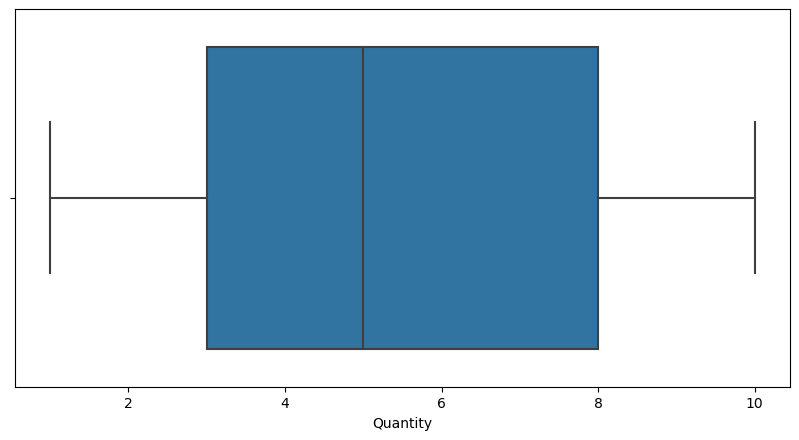

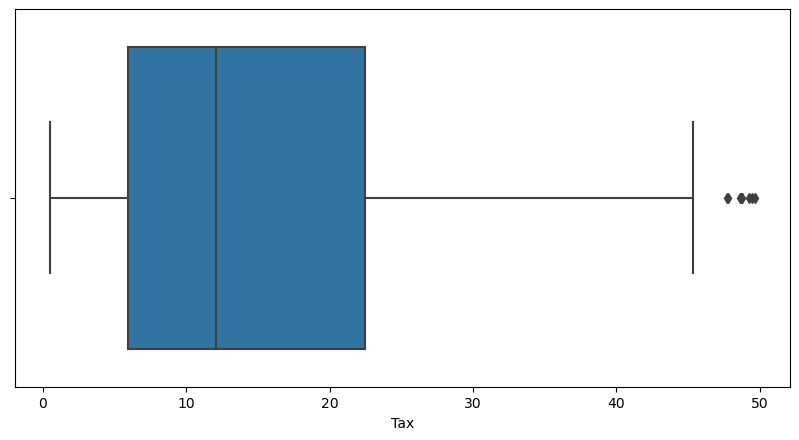

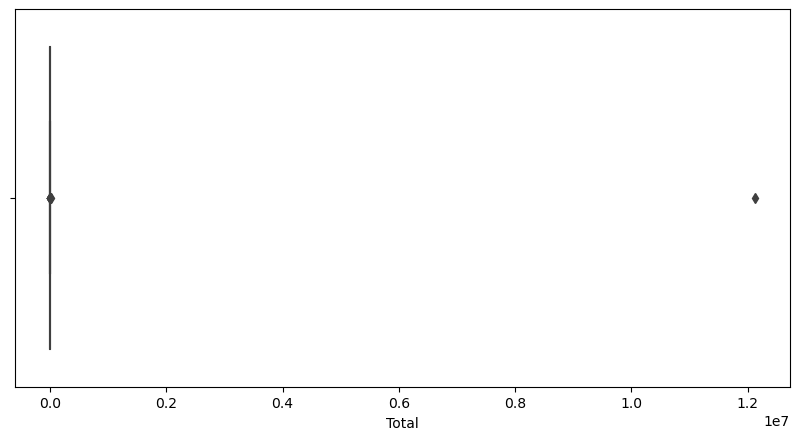

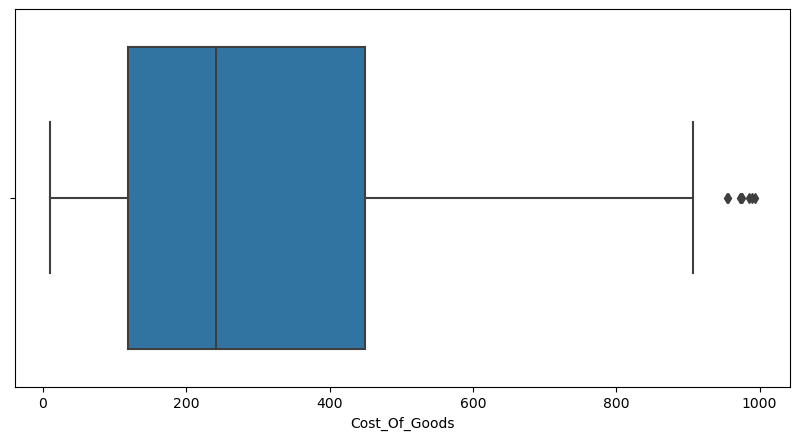

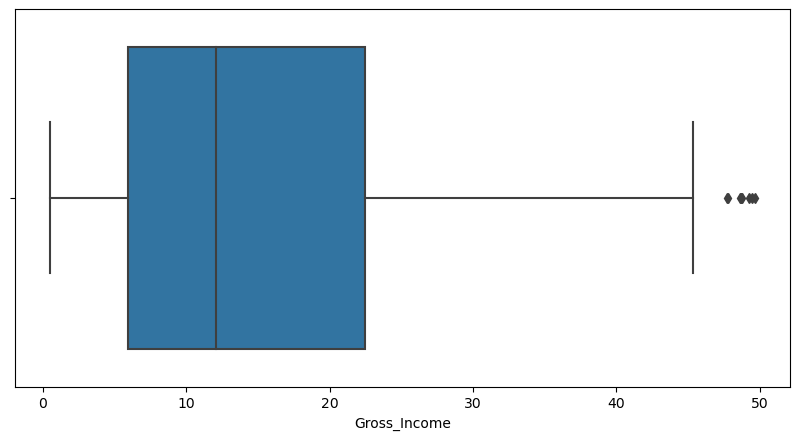

In [95]:
# Prints the boxplots of all the columns
box_plots(numeric_columns, ssd)

D:\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg

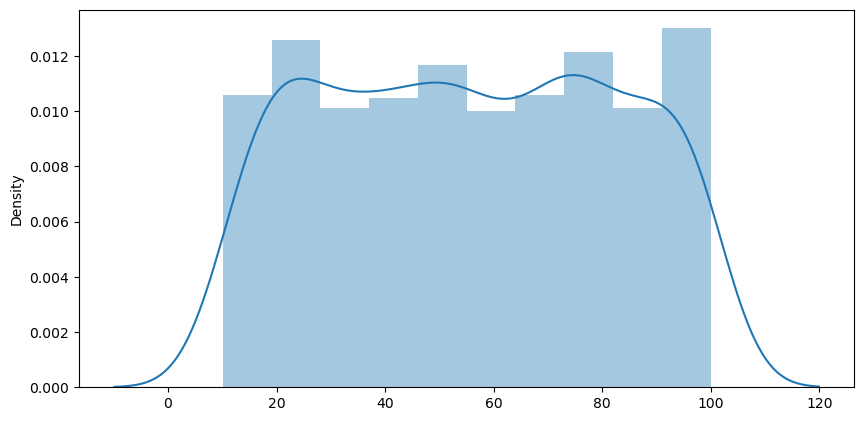

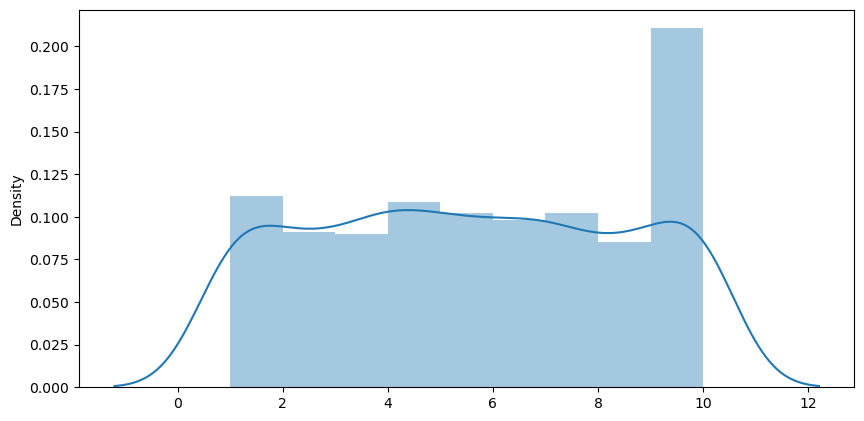

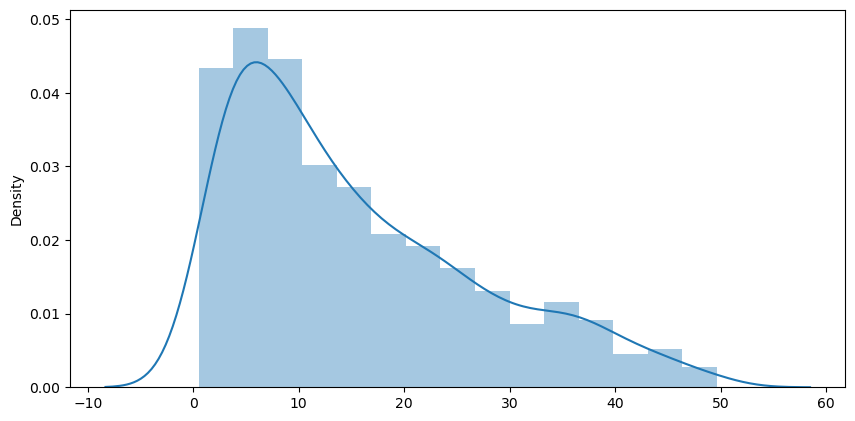

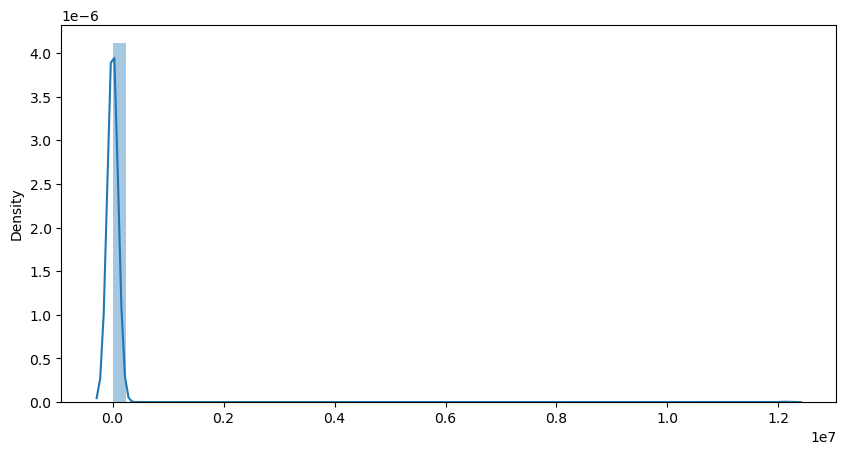

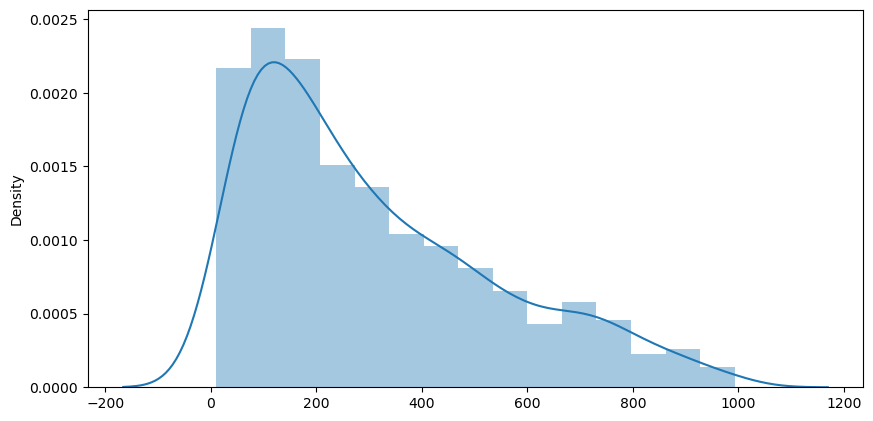

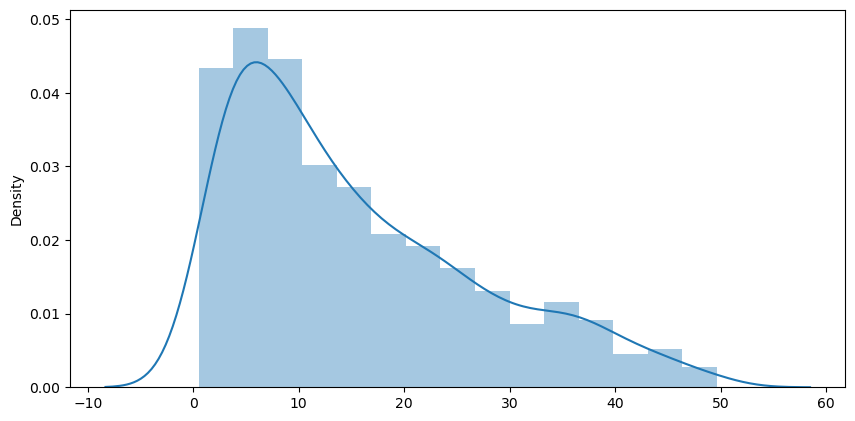

In [97]:
dis_plots(numeric_columns, ssd)

In [98]:
ssd['Total'].nlargest(5)

19     12121555.00
18        12234.00
350        1042.65
167        1039.29
557        1034.46
Name: Total, dtype: float64

In [99]:
ssd.loc[(ssd['Total'] == 12121555.0) | (ssd['Total'] == 12234.0)]

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Payment,Cost_Of_Goods,Gross_Income,Rating,DateTime
18,A,Yangon,Normal,Male,Food and beverages,54.67,3.0,8.2005,12234.0,Credit card,164.01,8.2005,8.6,2019-1-21 18:00
19,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2.0,4.0300,12121555.0,Ewallet,80.60,4.0300,4.4,2019-3-11 15:30


In [100]:
ssd.loc[18, 'Total'] = (ssd.loc[18,'Unit_Price'] * ssd.loc[18,'Quantity']) + ssd.loc[18,'Tax']
ssd.loc[19, 'Total'] = (ssd.loc[19,'Unit_Price'] * ssd.loc[19,'Quantity']) + ssd.loc[19,'Tax']

#### All columns except the Total column are fine due to a few outliers. We handled these outliers by interpolation with the correct values. 

D:\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Conda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg

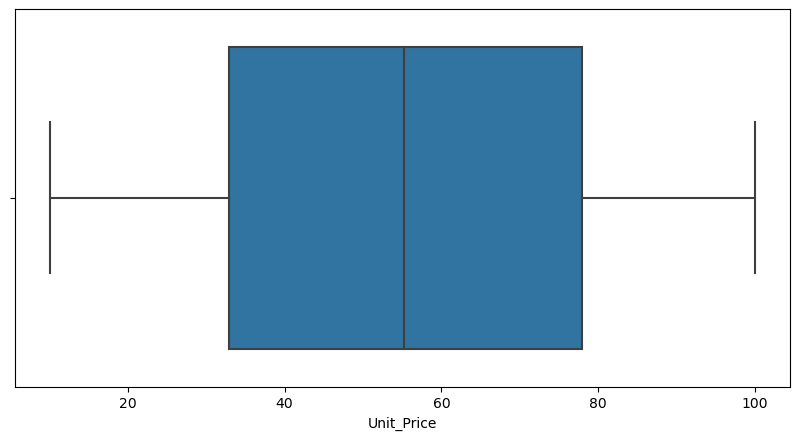

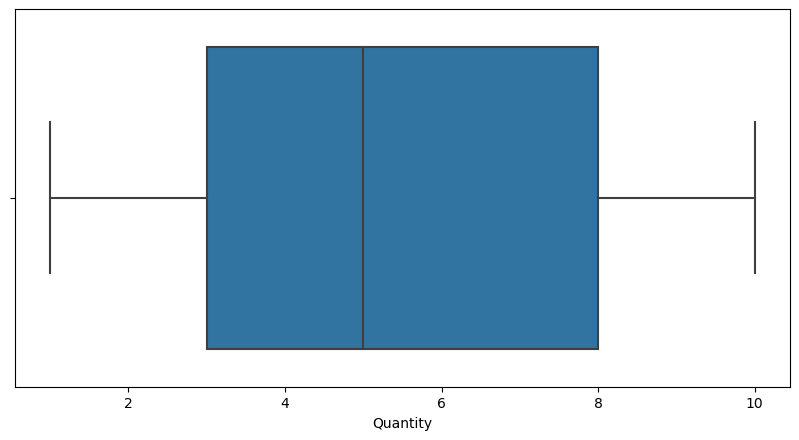

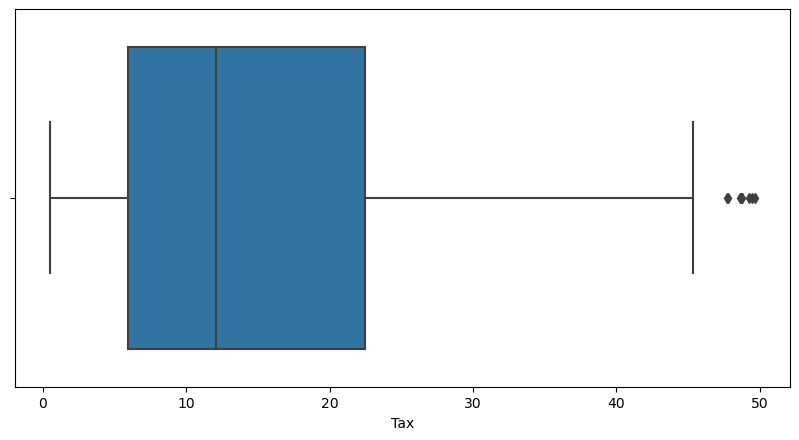

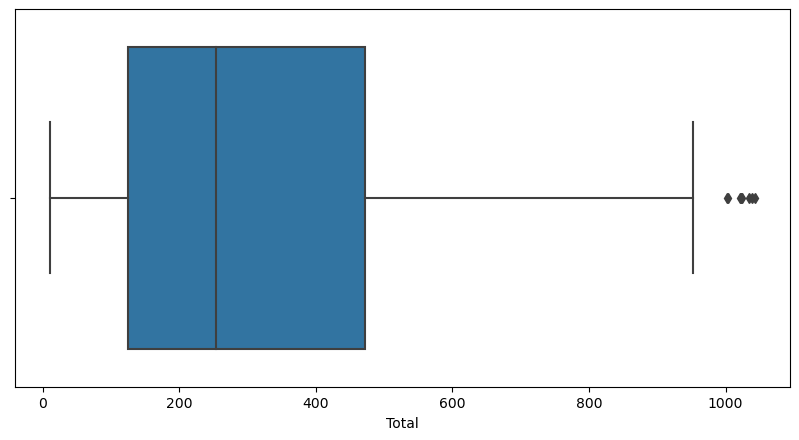

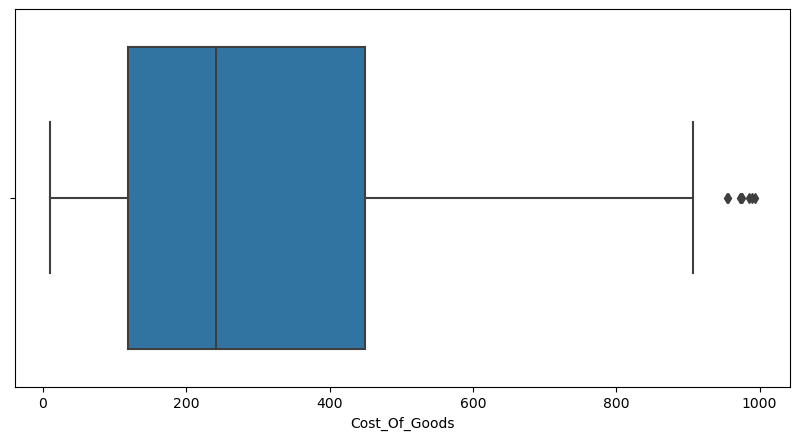

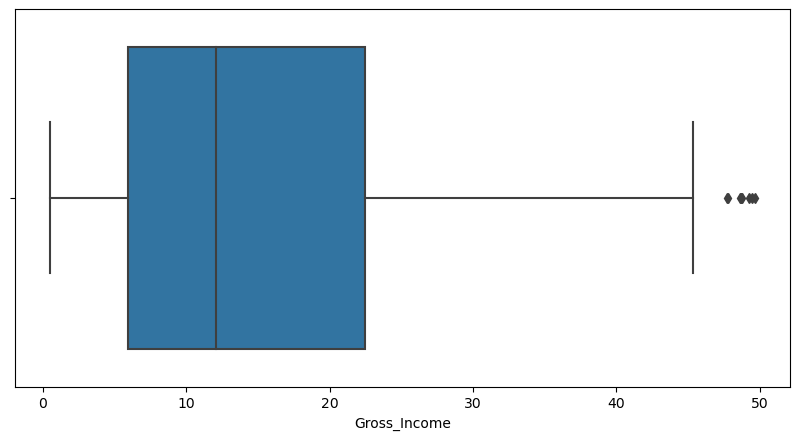

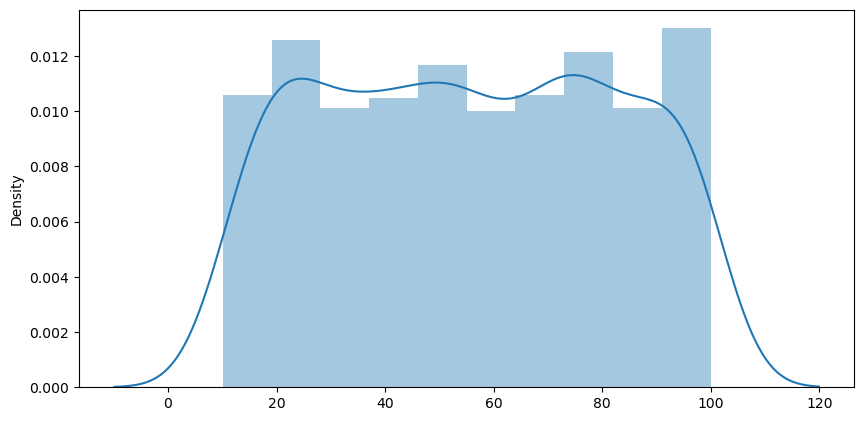

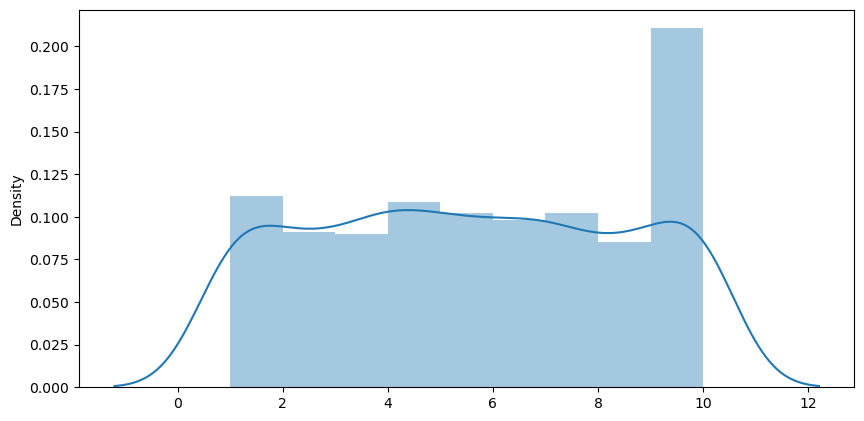

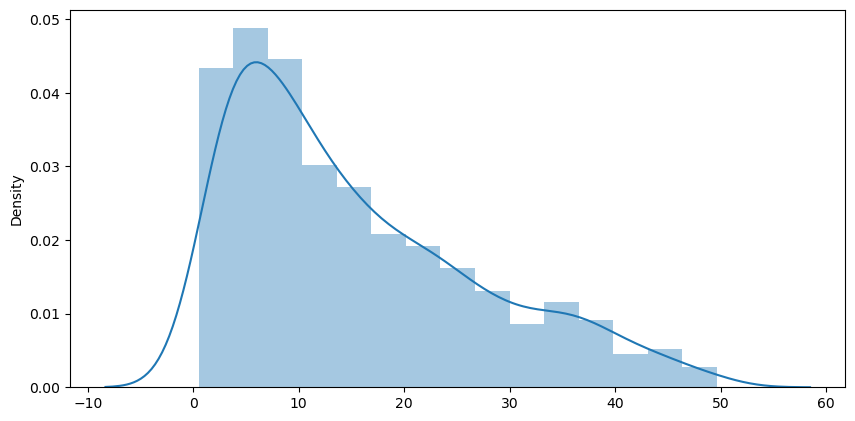

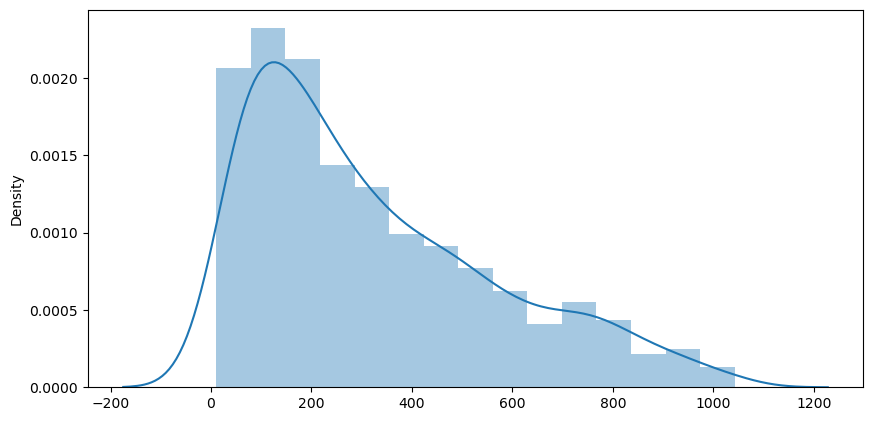

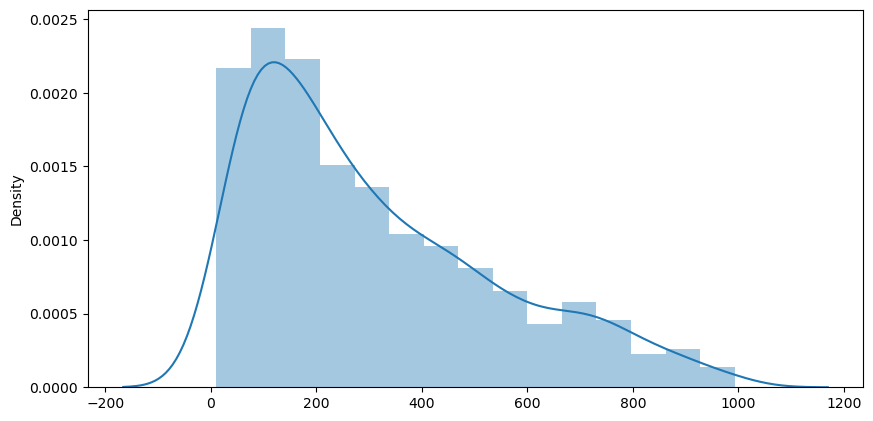

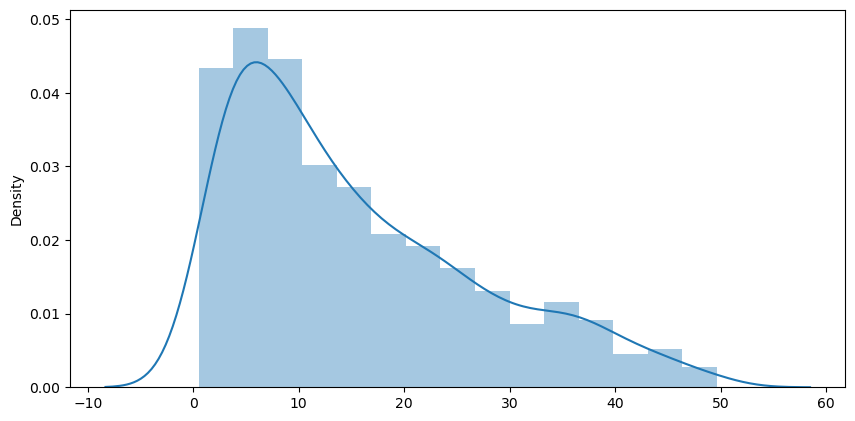

In [101]:
# Prints the boxplots of all the columns
box_plots(numeric_columns, ssd)
# Prints the distplots of all the columns
dis_plots(numeric_columns, ssd)

#### Boxplots and Distplots of all the features are now fine. Columns such as Total, Gross Income, Cost of goods sold, all have outliers, however, these outliers can't be discarded from a Business Intelligence perspective, since the company might want to know who the customers are who are purchasing goods worth in excess of $1000

## 6) Descriptive Statistics

<AxesSubplot:>

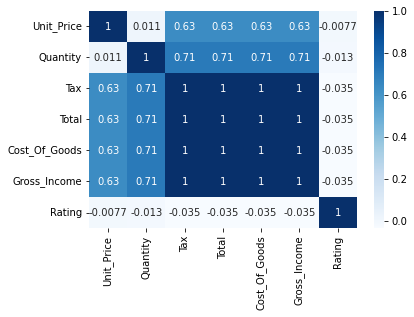

In [102]:
# Plotting heatmap
import seaborn as sns
corr = ssd.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

#### From the Heatmap above it can be seen that Tax, Total, COGS, Gross Income have a perfect positive correlation, since they all can be calculated by the formula (Quantity * UnitPrice + Tax). All these columns have a high correlation because they are dependant on each other. Rating has a poor correlation among all the other columns.

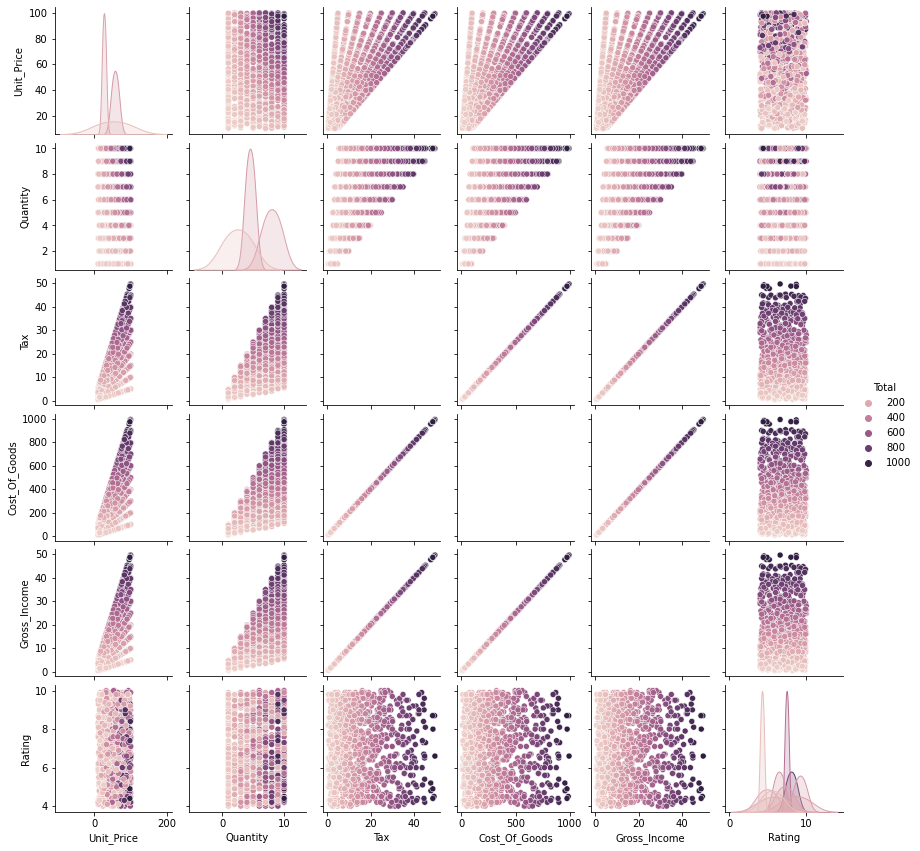

In [105]:
# From the heatmap we can construct scatter plots and hist plots 
# to get a better understanding of the relation between columns
import seaborn as sns
# Create the default pairplot
sns.pairplot(ssd, hue='Total', height=2);

#### Setting Total as the hue, since it is the main KPI for the Supermarket, we can see that there is a perfect positive correlation between tax, cost of goods, gross income and quantity since Total is derived or derives these values. There is no correlation between Rating and any feature wrt Total. And there is a somewhat positive correlation between Unit price and quantity and the other columns

D:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the f

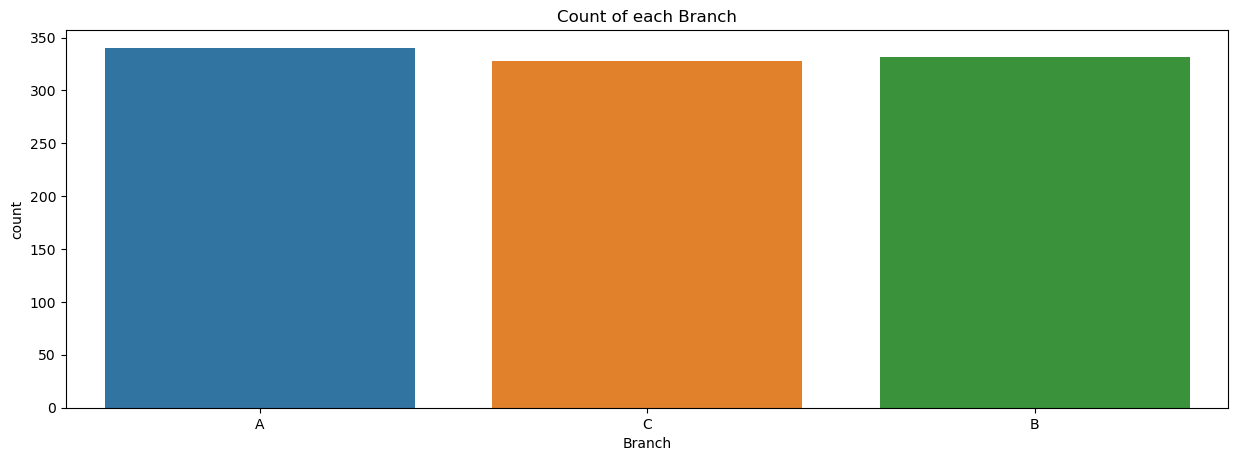

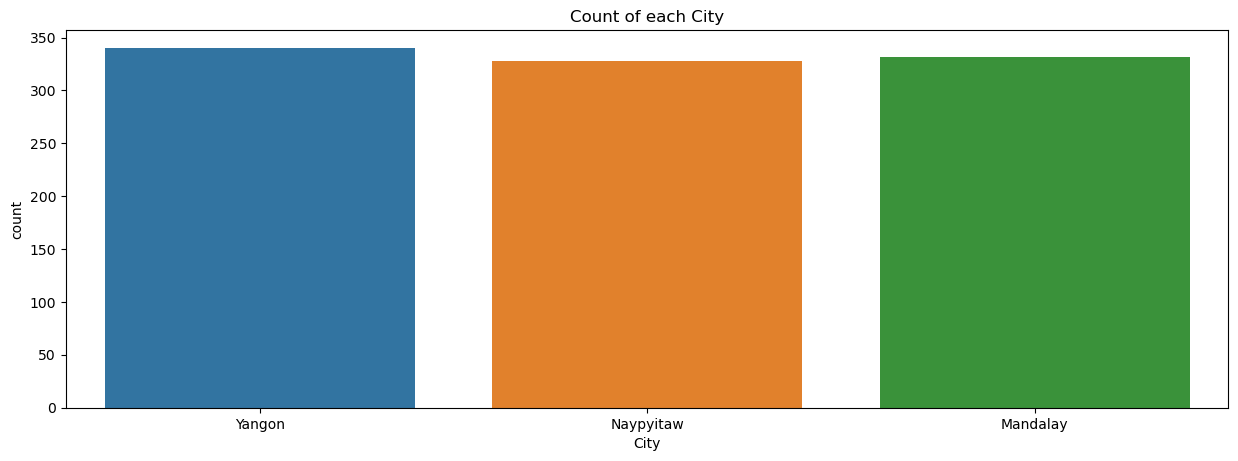

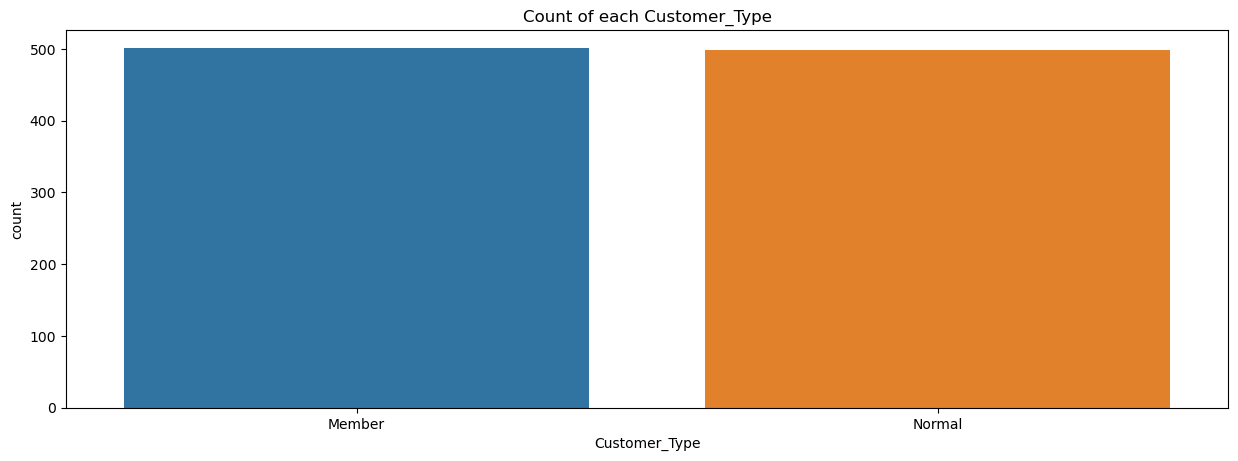

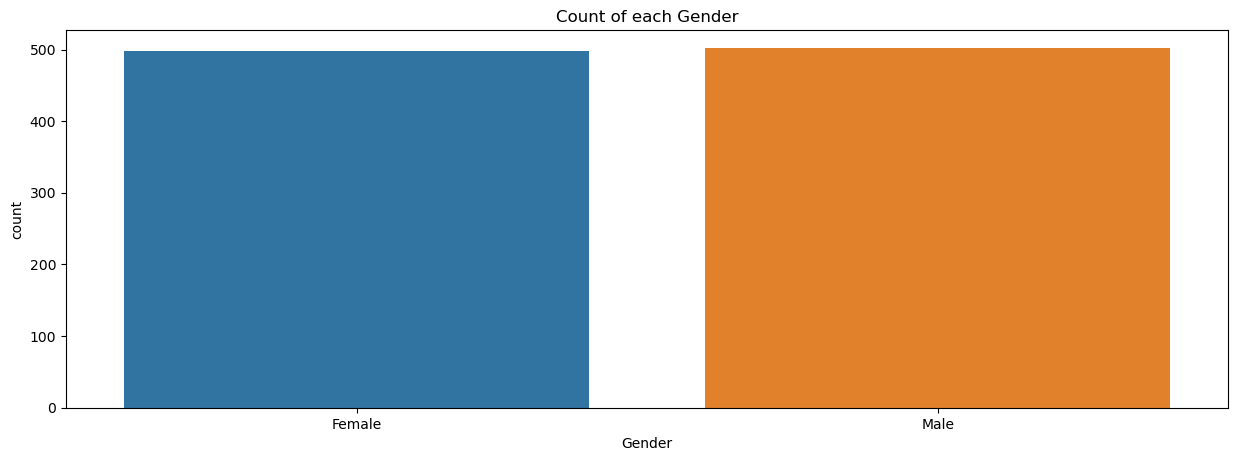

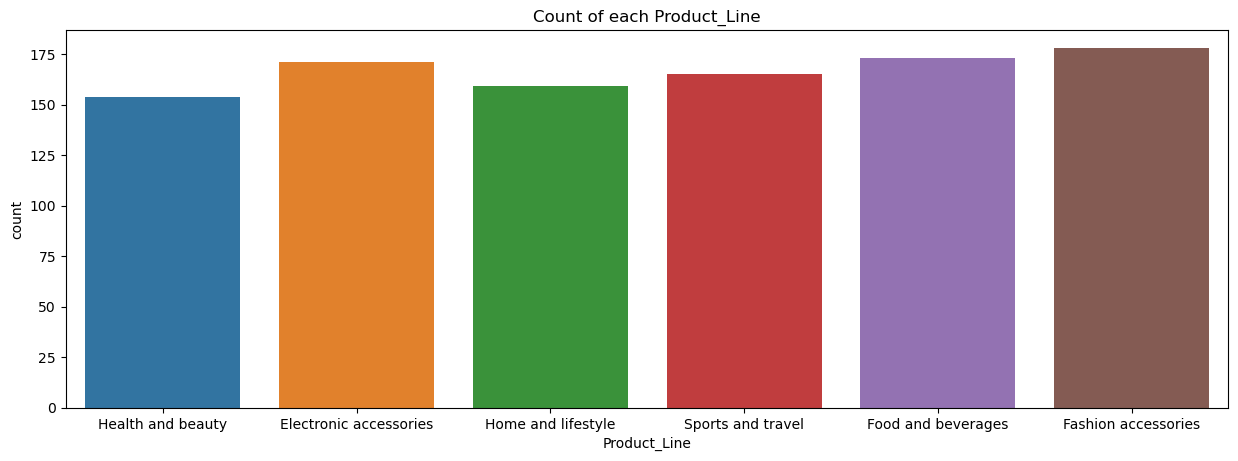

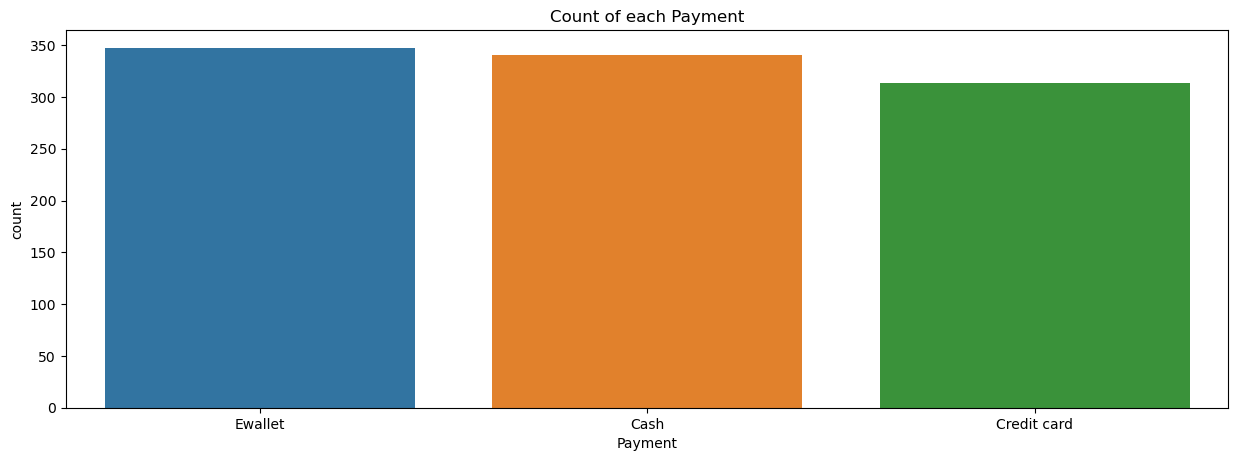

In [133]:
for cat_col in categorical_columns:
    plt.figure(figsize=(15, 5), dpi = 100)
    sns.countplot(ssd[cat_col])
    plt.title('Count of each ' + str(cat_col))

#### Above we can see that Branch A, which represents City Yangon has the most entries in the dataset. Customer Type is evenly distributed. So are Genders Male and Female. It can also bee seen that Fashion Accessories, Electronics and Food & Beverages are the most popular items judging by count. Lastly Ewallet is the most used mode of payment.

In [140]:
# Removing DateTime, since we don't want it's bar plot (No insight from it)
categorical_columns.remove('DateTime')

ValueError: list.remove(x): x not in list

In [135]:
ssd.loc[ssd['Product_Line'] == 'Elecronic accessories']

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Payment,Cost_Of_Goods,Gross_Income,Rating,DateTime


In [136]:
ssd.loc[97, 'Product_Line'] = 'Electronic accessories'

In [137]:
ssd.loc[ssd['City'] == 'C']

,Branch,City,Customer_Type,Gender,Product_Line,Unit_Price,Quantity,Tax,Total,Payment,Cost_Of_Goods,Gross_Income,Rating,DateTime


In [138]:
ssd.loc[43, 'City'] = 'Naypyitaw'

D:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the f

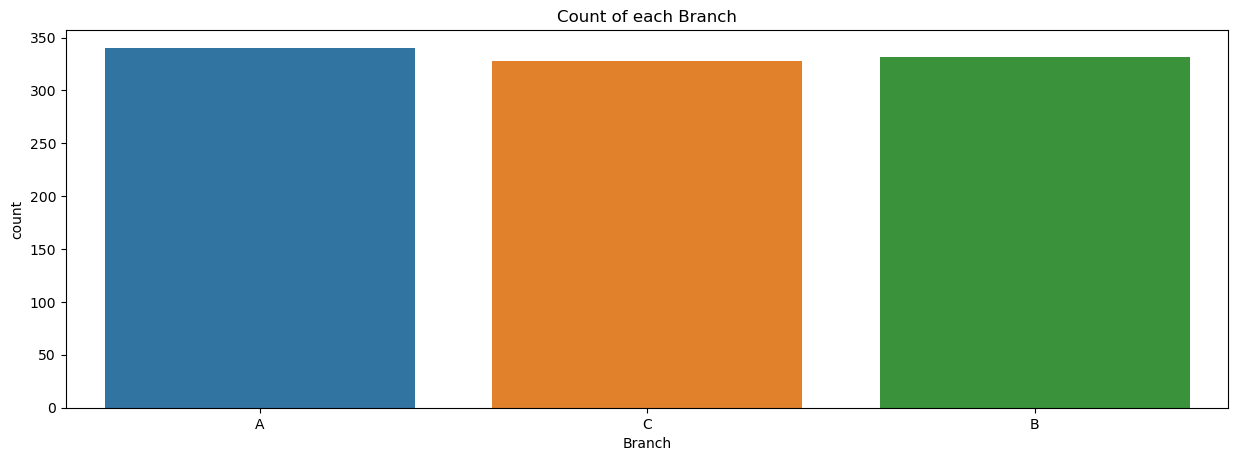

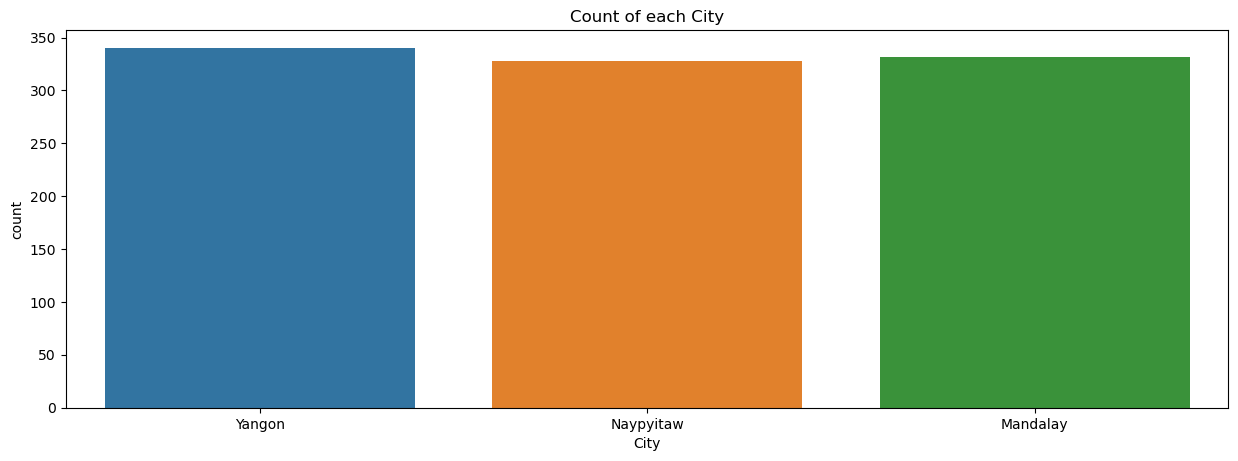

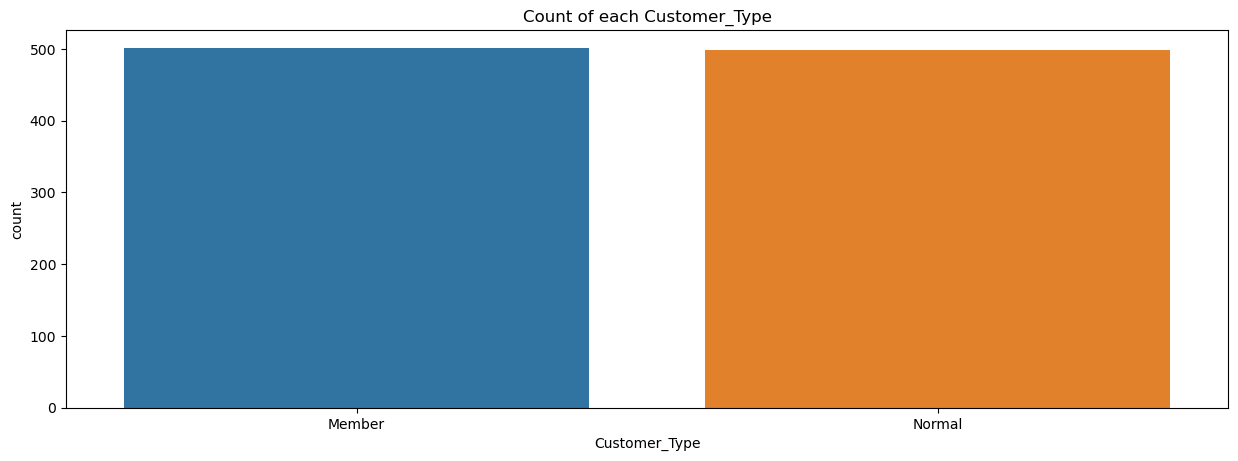

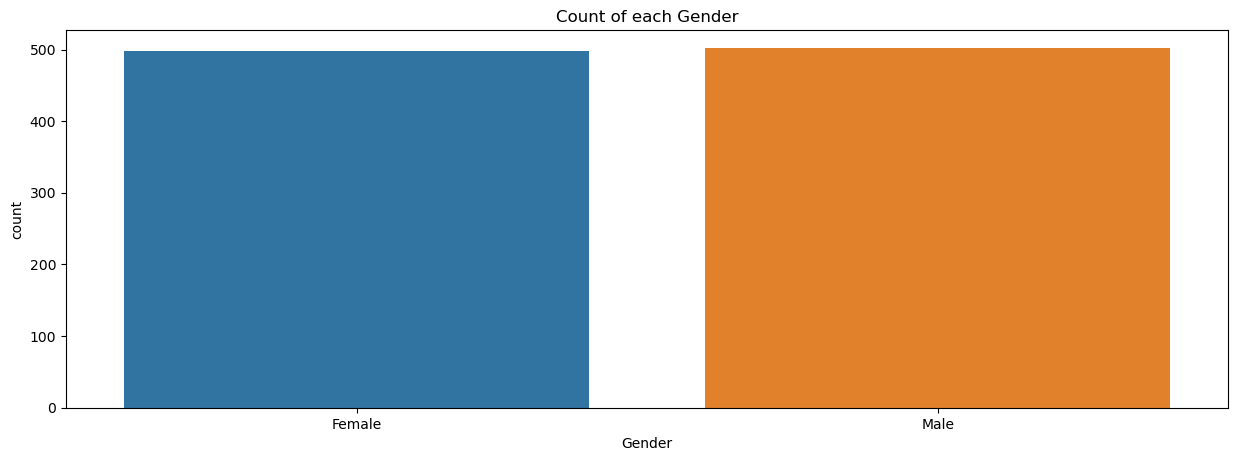

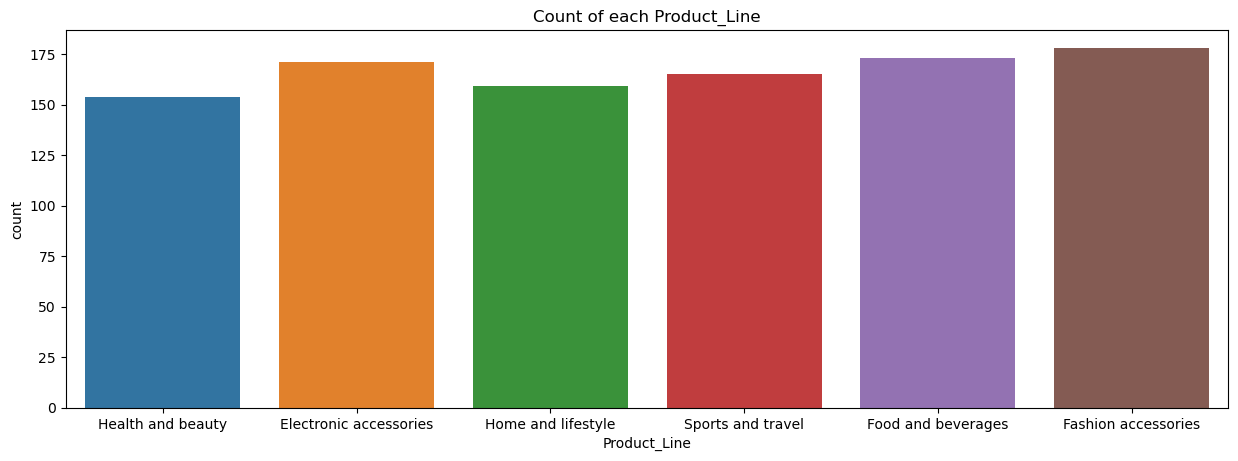

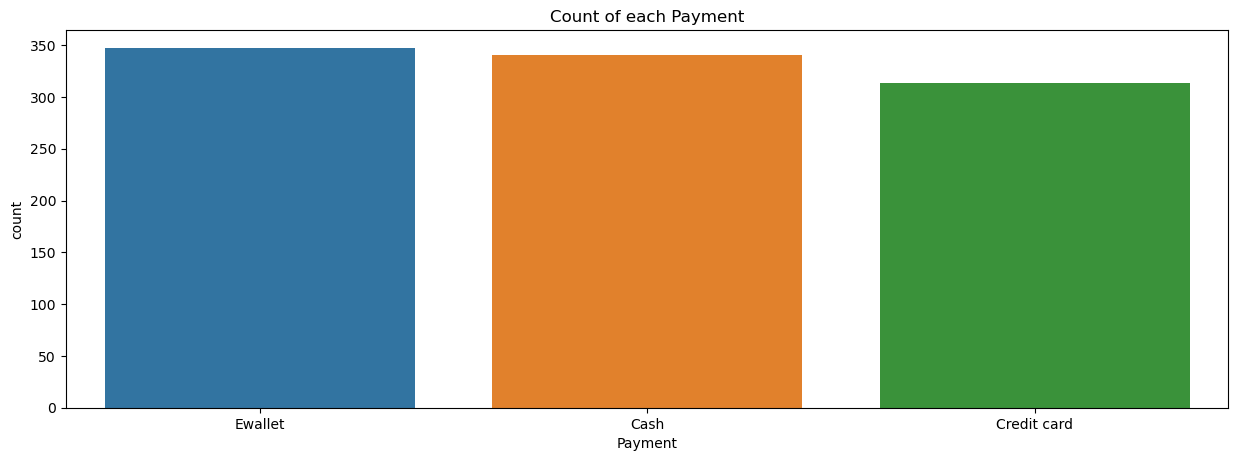

In [139]:
for cat_col in categorical_columns:
    plt.figure(figsize=(15, 5), dpi = 100)
    sns.countplot(ssd[cat_col])
    plt.title('Count of each ' + str(cat_col))

#### Handling the errors yields the above final result.

## 7) Inferential Statistics

In [114]:
# T-Test

def get_num_cols(df):
    types_map = df.dtypes.to_dict()
    num_columns = []
    for k,v in types_map.items():
        if np.issubdtype(np.int64, v) or np.issubdtype(np.float64, v):
            num_columns.append(k)

    print(num_columns)
    return num_columns

def t_test(df):
    num_columns = get_num_cols(df)
    for i in range(len(num_columns)-1):
        print("\n --------"+num_columns[i]+"--------")
        for j in range(i+1,len(num_columns)):
            col1 = num_columns[i]
            col2 = num_columns[j]
            t_val, p_val = stats.ttest_ind(ssd[col1], ssd[col2])
            print("(%s,%s) => t-value=%s, p-value=%s" % (num_columns[i], num_columns[j], str(t_val), str(p_val)))
            # interpret p-value
            alpha = 0.05
            #print('significance=%.3f, p=%.3f' % (alpha, p_val))
            if p_val <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')


In [115]:
t_test(ssd)

['Unit_Price', 'Quantity', 'Tax', 'Total', 'Cost_Of_Goods', 'Gross_Income', 'Rating']

 --------Unit_Price--------
(Unit_Price,Quantity) => t-value=59.510051852604406, p-value=0.0
Dependent (reject H0)
(Unit_Price,Tax) => t-value=43.98757502882582, p-value=3.8136673806304974e-296
Dependent (reject H0)
(Unit_Price,Total) => t-value=-34.17833694884744, p-value=5.3761578892393085e-202
Dependent (reject H0)
(Unit_Price,Cost_Of_Goods) => t-value=-33.80252663098899, p-value=1.7723471193427544e-198
Dependent (reject H0)
(Unit_Price,Gross_Income) => t-value=43.98757502882582, p-value=3.8136673806304974e-296
Dependent (reject H0)
(Unit_Price,Rating) => t-value=nan, p-value=nan
Independent (fail to reject H0)

 --------Quantity--------
(Quantity,Tax) => t-value=-25.860952601110867, p-value=1.9210323645434736e-127
Dependent (reject H0)
(Quantity,Total) => t-value=-40.824534690836835, p-value=1.7771045637821046e-265
Dependent (reject H0)
(Quantity,Cost_Of_Goods) => t-value=-40.7888102851453, p-val

In [116]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_square_test(cat_cols, df):
    for i in range(len(cat_cols)-1):
        print("\n\t --------"+cat_cols[i]+"--------")
        for j in range(i+1,len(cat_cols)):
            cat_var1 = cat_cols[i]
            cat_var2 = cat_cols[j]
            data_crosstab = pd.crosstab(ssd[cat_var1], ssd[cat_var2], margins = False) 
            print(data_crosstab) 

            stat, p, dof, expected = chi2_contingency(data_crosstab)
            print('dof=%d' % dof)
            print(expected)

    # interpret p-value
            alpha = 0.05
            print('significance=%.3f, p=%.3f' % (alpha, p))
            if p <= alpha:
                print('Dependent (reject H0)')
            else:
                print('Independent (fail to reject H0)')
            print("\n")

In [117]:
chi_square_test(categorical_columns, ssd)


	 --------Branch--------
City    Mandalay  Naypyitaw  Yangon
Branch                             
A              0          0     340
B            332          0       0
C              0        328       0
dof=4
[[112.88  111.52  115.6  ]
 [110.224 108.896 112.88 ]
 [108.896 107.584 111.52 ]]
significance=0.050, p=0.000
Dependent (reject H0)


Customer_Type  Member  Normal
Branch                       
A                 167     173
B                 165     167
C                 169     159
dof=2
[[170.34  169.66 ]
 [166.332 165.668]
 [164.328 163.672]]
significance=0.050, p=0.811
Independent (fail to reject H0)


Gender  Female  Male
Branch              
A          162   178
B          158   174
C          178   150
dof=2
[[169.32  170.68 ]
 [165.336 166.664]
 [163.344 164.656]]
significance=0.050, p=0.142
Independent (fail to reject H0)


Product_Line  Electronic accessories  Fashion accessories  Food and beverages  \
Branch                                                            

In [118]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):   
        num_col = num_cols[i]
        for j in range(len(cat_cols)-1):
            cat_col = cat_cols[j]
            mod = ols(num_col+" ~ "+cat_col,data=ssd).fit()
            aov_table=sm.stats.anova_lm(mod, typ=2)
            print ("\nANOVA => "+num_col+" - "+cat_col)
            print(aov_table)
            print()

In [119]:
anova_test(numeric_columns, categorical_columns, ssd)


ANOVA => Unit_Price - Branch
                 sum_sq     df         F    PR(>F)
Branch       558.051196    2.0  0.397012  0.672432
Residual  700705.314767  997.0       NaN       NaN


ANOVA => Unit_Price - City
                 sum_sq     df         F    PR(>F)
City         558.051196    2.0  0.397012  0.672432
Residual  700705.314767  997.0       NaN       NaN


ANOVA => Unit_Price - Customer_Type
                      sum_sq     df        F    PR(>F)
Customer_Type     287.217548    1.0  0.40892  0.522665
Residual       700976.148415  998.0      NaN       NaN


ANOVA => Unit_Price - Gender
                 sum_sq     df         F    PR(>F)
Gender       125.942880    1.0  0.179267  0.672095
Residual  701137.423083  998.0       NaN       NaN


ANOVA => Unit_Price - Product_Line
                     sum_sq     df         F    PR(>F)
Product_Line    1550.866549    5.0  0.440627  0.820256
Residual      699712.499414  994.0       NaN       NaN


ANOVA => Quantity - Branch
               su

In [120]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


def tukeyhsd_test(num_cols, cat_cols, df):
    for i in range(len(num_cols)-1):
        num_var = num_cols[i]
        print("\t-------------"+num_var+"-------------")
        for j in range(len(cat_cols)-1):
            cat_var = cat_cols[j]
            tukey = pairwise_tukeyhsd(endog=ssd[num_var], groups=ssd[cat_var], alpha=0.05)
            #display results
            
            print(cat_var)
            print(tukey)
            print()

In [121]:
tukeyhsd_test(numeric_columns, categorical_columns, ssd)

	-------------Unit_Price-------------
Branch
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.8784 0.8981 -3.9229 5.6797  False
     A      C   1.8282  0.634 -2.9879 6.6442  False
     B      C   0.9497 0.8805 -3.8947 5.7942  False
---------------------------------------------------

City
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1    group2  meandiff p-adj   lower  upper  reject
---------------------------------------------------------
 Mandalay Naypyitaw   0.9497 0.8805 -3.8947 5.7942  False
 Mandalay    Yangon  -0.8784 0.8981 -5.6797 3.9229  False
Naypyitaw    Yangon  -1.8282  0.634 -6.6442 2.9879  False
---------------------------------------------------------

Customer_Type
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
Member N

## 8) Some DWH Analysis

In [122]:
from pandas_profiling import ProfileReport
prof = ProfileReport(ssd)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Customer Type that Generated the most Profit

In [123]:
print('Customer Type: ', ssd.groupby('Customer_Type')['Total'].sum().idxmax())
print('Total by that Customer Type: ', ssd.groupby('Customer_Type')['Total'].sum().max())

Customer Type:  Member
Total by that Customer Type:  164223.444


#### Ranking of cities from those that generated the most profit to least

In [141]:
print('City Rank: ', ssd.groupby('City')['Total'].sum().sort_values(ascending=False))

City Rank:  City
Naypyitaw    110568.7065
Yangon       106200.3705
Mandalay     106197.6720
Name: Total, dtype: float64


#### Plot shows that Mandalay generated the most profit followed by Naypyitaw and Yangon

Text(0, 0.5, 'Sum of Sales')

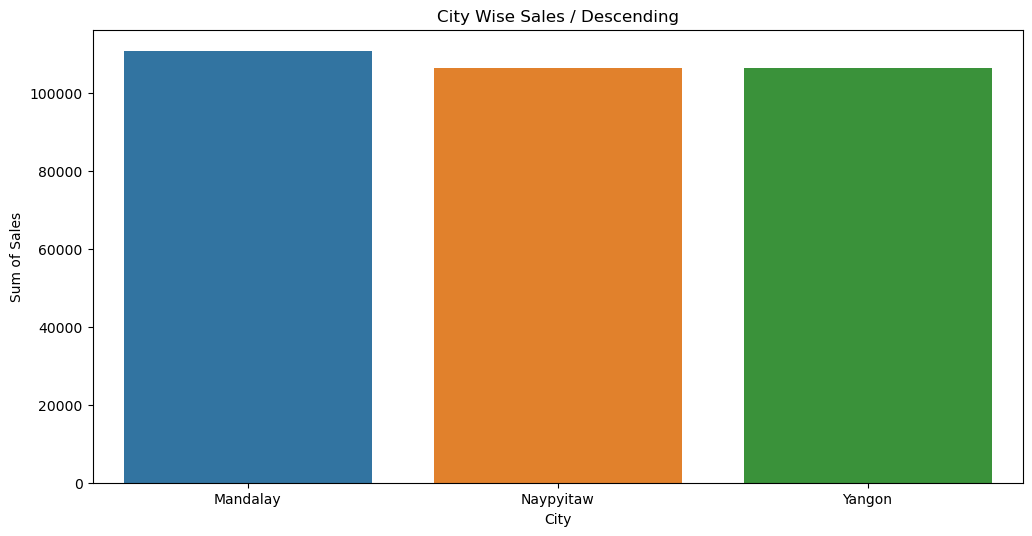

In [125]:
plt.figure(figsize=(12, 6), dpi = 100)
sns.barplot(x = ssd.groupby('City')['Total'].sum().index, y = ssd.groupby('City')['Total'].sum().sort_values(ascending=False).values)
plt.title('City Wise Sales / Descending')
plt.ylabel('Sum of Sales')

#### Ranking of Gender based on the profit that each generated.

In [126]:
print('Gender Wise Sales: ', ssd.groupby('Gender')['Total'].sum().sort_values(ascending=False))

Gender Wise Sales:  Gender
Female    166928.790
Male      156037.959
Name: Total, dtype: float64


#### In the plot below we can see that females Edge over males when it comes to sales

Text(0, 0.5, 'Sum of Sales')

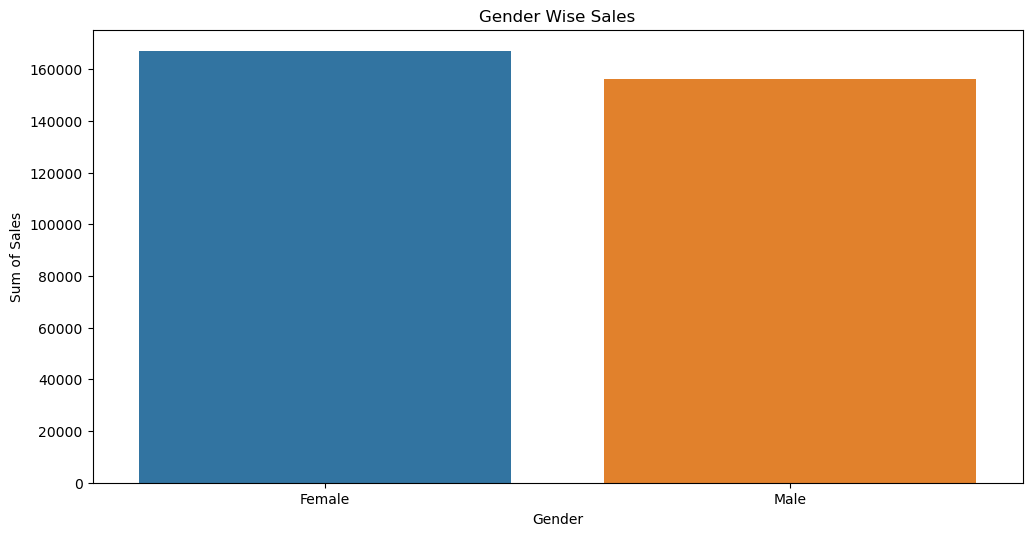

In [127]:
plt.figure(figsize=(12, 6), dpi = 100)
sns.barplot(x = ssd.groupby('Gender')['Total'].sum().index, y = ssd.groupby('Gender')['Total'].sum().values)
plt.title('Gender Wise Sales')
plt.ylabel('Sum of Sales')

#### Which Product Line was the most successful amongst the customers

In [128]:
print('Product Line: ', ssd.groupby('Product_Line')['Total'].sum().idxmax())
print('Total by that Product Line: ', ssd.groupby('Product_Line')['Total'].sum().max())

Product Line:  Food and beverages
Total by that Product Line:  56237.433


Text(0.5, 0, 'Product Lines')

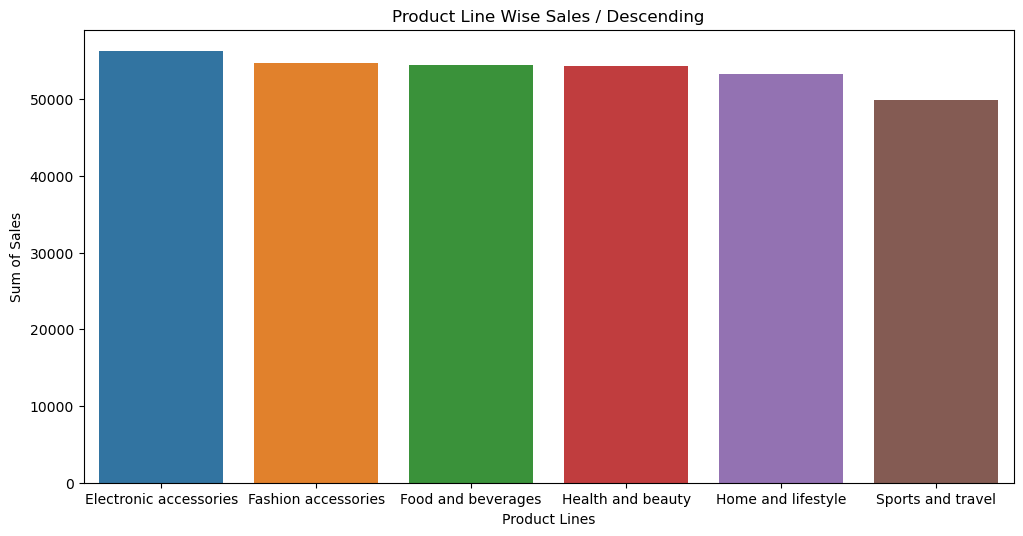

In [129]:
plt.figure(figsize=(12, 6), dpi = 100)
sns.barplot(x = ssd.groupby('Product_Line')['Total'].sum().index, y = ssd.groupby('Product_Line')['Total'].sum().sort_values(ascending=False).values)
plt.title('Product Line Wise Sales / Descending')
plt.ylabel('Sum of Sales')
plt.xlabel('Product Lines')

#### It can be seen that Electronic Accessories have the most popular amongst the customers

In [130]:
print('Product Line by Gender: ', ssd.groupby(['Product_Line', 'Gender'])['Total'].sum().idxmax())
print('Total by that Gender: ', ssd.groupby(['Product_Line', 'Gender'])['Total'].sum().max())

Product Line by Gender:  ('Food and beverages', 'Female')
Total by that Gender:  33834.212999999996


#### Above it can be seen that Females have been spending the most amount of money, on foods and beverages.

In [131]:
print('Payment wise Total: ', ssd.groupby('Payment')['Total'].sum().sort_values(ascending=False))

Payment wise Total:  Payment
Cash           111807.717
Ewallet        108565.170
Credit card    102593.862
Name: Total, dtype: float64


#### Which payment method had the most sales associated with it. 

Text(0.5, 0, 'Payment Type')

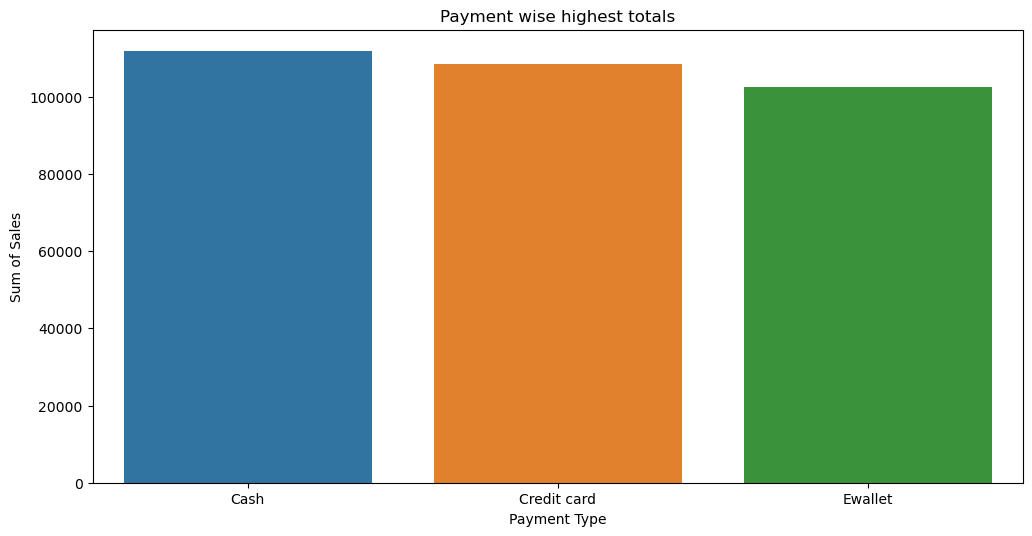

In [132]:
plt.figure(figsize=(12, 6), dpi = 100)
sns.barplot(x = ssd.groupby('Payment')['Total'].sum().index, y = ssd.groupby('Payment')['Total'].sum().sort_values(ascending=False).values)
plt.title('Payment wise highest totals')
plt.ylabel('Sum of Sales')
plt.xlabel('Payment Type')

#### Looks like cash has been used as the most popular mode of payment, Total wise. Count wise it was Ewallet